In [77]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [78]:
import os
import json
from glob import glob
from collections import namedtuple

import torch
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from bbb.utils.pytorch_setup import DEVICE
from bbb.utils.plotting import plot_weight_samples
from bbb.config.constants import KL_REWEIGHTING_TYPES, PRIOR_TYPES, VP_VARIANCE_TYPES
from bbb.config.parameters import Parameters, PriorParameters
from bbb.models.dnn import ClassificationDNN
from bbb.models.bnn import ClassificationBNN
from bbb.data import load_mnist
from bbb.models.layers import BaseBFC

from labellines import labelLines

from evaluate_classifier import evaluate_classifier
from model_details import MODEL_DETAILS_DICT, load_model, ModelDetails

import pickle

In [37]:
matplotlib.style.use('default')
plt.rcParams.update({'axes.titlesize': 'large', 'axes.labelsize': 'medium'})
colors_hex = {'blue': '#1F77B4', 'orange': '#FF7F0E', 'green': '#2CA02C'}
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

## Set & Load Model

In [27]:
MODEL = "bnn_sgp_600_1200"
MODEL_DETAILS = MODEL_DETAILS_DICT[MODEL]
net, params = load_model(MODEL)

MODEL_DETAILS

2022-03-29 00:34:08,411 - bbb.models.layers - INFO - Weights Prior: Gaussian with mean 0 and variance 1.0
2022-03-29 00:34:08,412 - bbb.models.layers - INFO - Biases Prior: Gaussian with mean 0 and variance 1.0
2022-03-29 00:34:08,422 - bbb.models.layers - INFO - Weights Prior: Gaussian with mean 0 and variance 1.0
2022-03-29 00:34:08,422 - bbb.models.layers - INFO - Biases Prior: Gaussian with mean 0 and variance 1.0
2022-03-29 00:34:08,424 - bbb.models.layers - INFO - Weights Prior: Gaussian with mean 0 and variance 1.0
2022-03-29 00:34:08,424 - bbb.models.layers - INFO - Biases Prior: Gaussian with mean 0 and variance 1.0


ModelDetails(dir='../saved_models/BBB_classification/baseline/single_gaussian_prior/600_epochs/1200/2022-03-27-20.30.22', mclass=<class 'bbb.models.bnn.ClassificationBNN'>, description='BNN - 1200 hidden units, SGP, 600 epochs')

In [28]:
test_errors = 1 - np.load(os.path.join(MODEL_DETAILS.dir, 'eval_metric.npy'))
test_errors

array([0.07011217, 0.02053285, 0.01973158, 0.01642627, 0.01692706,
       0.01522434, 0.01522434, 0.015625  , 0.01432288, 0.01442307,
       0.01482373, 0.01492387, 0.01482373, 0.01522434, 0.01382208,
       0.01542467, 0.01482373, 0.01252002, 0.01402241, 0.01352161,
       0.01292068, 0.01282048, 0.01352161, 0.01362181, 0.01402241,
       0.01372194, 0.01322114, 0.01252002, 0.01262015, 0.01151842])

## Load Data

In [38]:
X_val = load_mnist(train=False, batch_size=params.batch_size, shuffle=True)

In [12]:
net.evaluate(X_val)

tensor(0.9848)

In [11]:
eval_dict = evaluate_classifier(net, X_val)
eval_dict['eval_score']

tensor(0.9845)

## Plot Weights

2022-03-30 14:11:20,521 - bbb.models.layers - INFO - Weights Prior: Gaussian with mean 0 and variance 1.0
2022-03-30 14:11:20,521 - bbb.models.layers - INFO - Biases Prior: Gaussian with mean 0 and variance 1.0
2022-03-30 14:11:20,526 - bbb.models.layers - INFO - Weights Prior: Gaussian with mean 0 and variance 1.0
2022-03-30 14:11:20,526 - bbb.models.layers - INFO - Biases Prior: Gaussian with mean 0 and variance 1.0
2022-03-30 14:11:20,527 - bbb.models.layers - INFO - Weights Prior: Gaussian with mean 0 and variance 1.0
2022-03-30 14:11:20,527 - bbb.models.layers - INFO - Biases Prior: Gaussian with mean 0 and variance 1.0


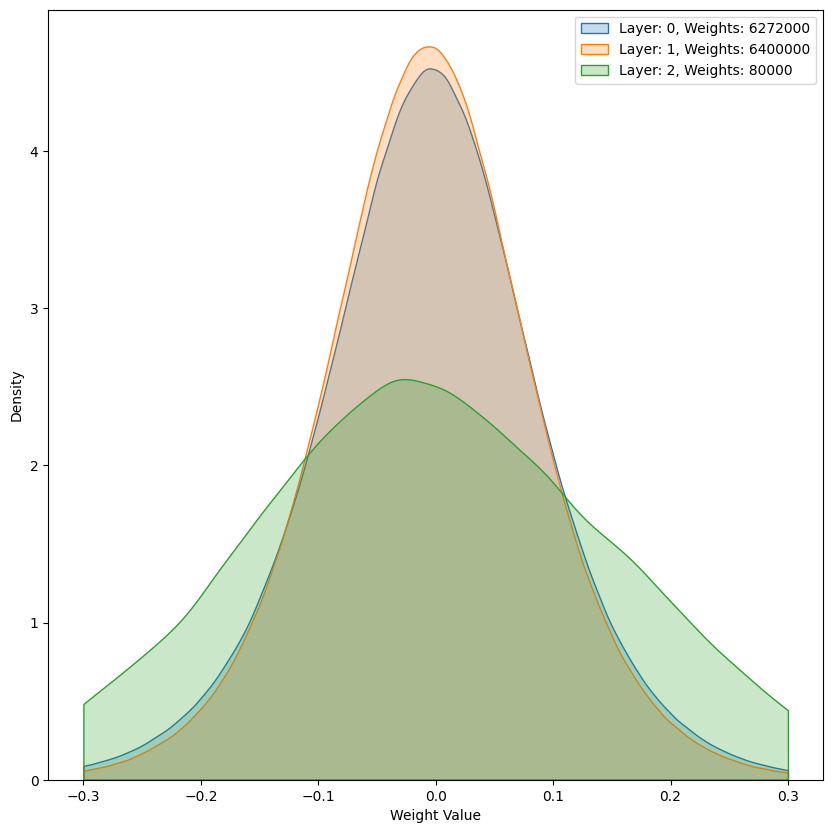

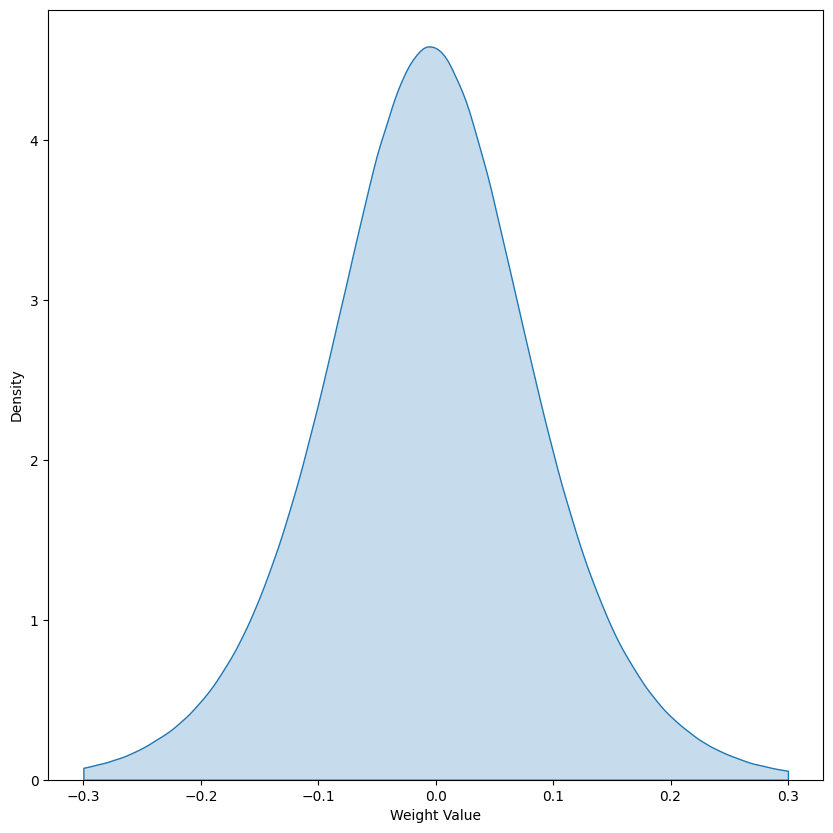

In [136]:
model = 'bnn_sgp_600_800'
net, params = load_model(model)
MODEL_DETAILS = MODEL_DETAILS_DICT[model]
plot_weight_samples(net.weight_samples())

## Remove Weight with Low S/N Ratio

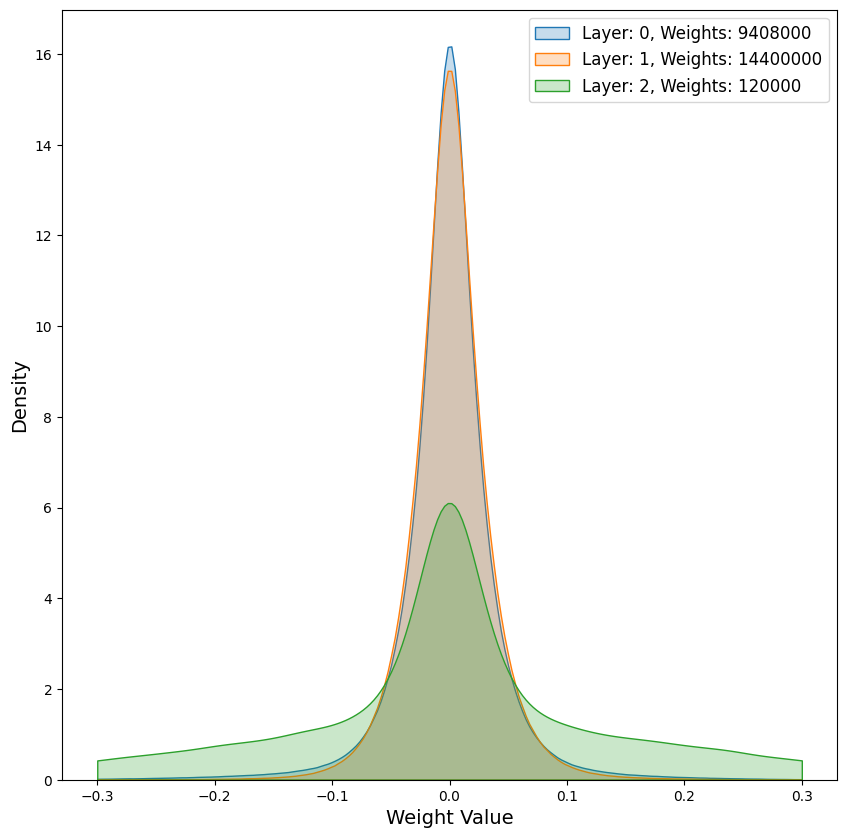

In [135]:
save_dir = "../plots/classification/"
weight_samples = net.weight_samples()
histogram_args = {
    'density': True,
    'bins': 50,
    'alpha': 0.5
}

######################
# Plots for each layer
######################

fig, ax = plt.subplots(1, 1, figsize=(10,10))
for i, weights in enumerate(weight_samples):
        sns.kdeplot(weights.detach().cpu().numpy(), label=f'Layer: {i}, Weights: {weights.shape[0]}', fill=True, clip=[-0.3, 0.3])

# Formatting of plot
ax.set_xlabel('Weight Value', fontsize=14)
ax.set_ylabel('Density', fontsize=14)

# Add legend
ax.legend(prop={'size': 12})

# Save the figure
# plt.savefig(os.path.join(save_dir, '1200_weights_per_layer_plot.png'), pad_inches=0.2, bbox_inches='tight')

# Display the plot
plt.show()

In [134]:
model = 'bnn_mog_600_1200'
net, params = load_model(model)
MODEL_DETAILS = MODEL_DETAILS_DICT[model]

2022-03-30 14:10:02,268 - bbb.models.layers - INFO - Weights Prior: Gaussian mixture with means (0, 0), variances (1.0, 0.0009118819655545162) and weight 0.5
2022-03-30 14:10:02,268 - bbb.models.layers - INFO - Biases Prior: Gaussian mixture with means (0, 0), variances (1.0, 0.0009118819655545162) and weight 0.5
2022-03-30 14:10:02,278 - bbb.models.layers - INFO - Weights Prior: Gaussian mixture with means (0, 0), variances (1.0, 0.0009118819655545162) and weight 0.5
2022-03-30 14:10:02,279 - bbb.models.layers - INFO - Biases Prior: Gaussian mixture with means (0, 0), variances (1.0, 0.0009118819655545162) and weight 0.5
2022-03-30 14:10:02,280 - bbb.models.layers - INFO - Weights Prior: Gaussian mixture with means (0, 0), variances (1.0, 0.0009118819655545162) and weight 0.5
2022-03-30 14:10:02,281 - bbb.models.layers - INFO - Biases Prior: Gaussian mixture with means (0, 0), variances (1.0, 0.0009118819655545162) and weight 0.5


In [124]:
weight_mean_tensors, weight_std_tensors = net.get_weights()
weight_snr_tensors = [10*torch.log10(torch.abs(weight_mean_tensors[i])/weight_std_tensors[i]) for i in range(len(weight_mean_tensors))]

In [125]:
weight_snrs = np.array([])
for i in weight_snr_tensors:
    weight_snrs = np.hstack((weight_snrs, i.flatten().detach().numpy()))

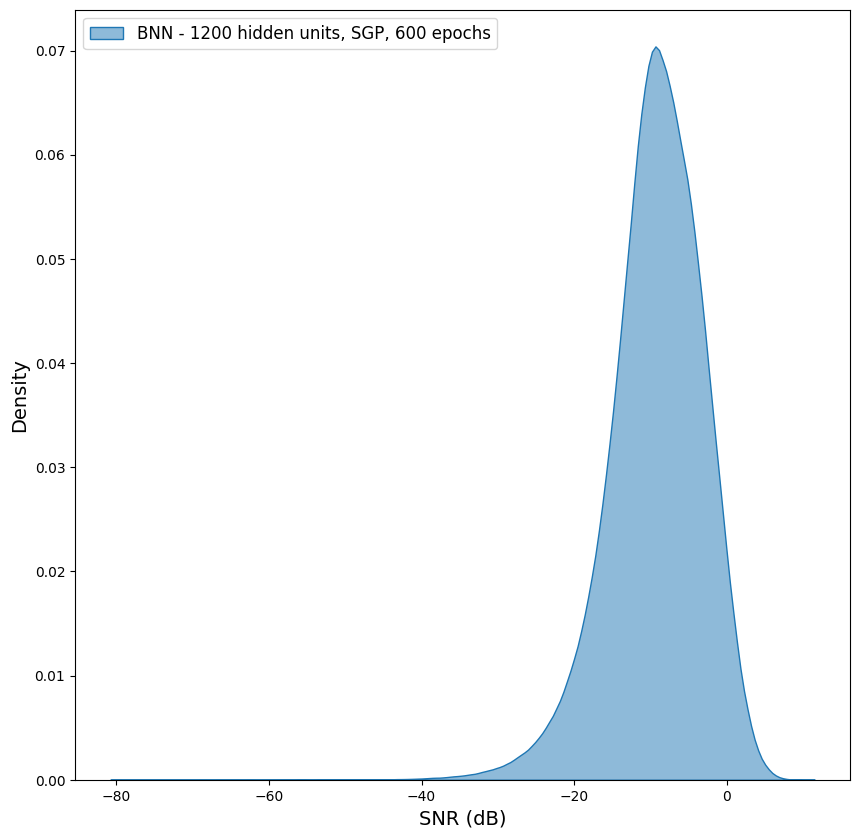

In [130]:
save_dir = "../plots/classification/pruning"
fig, ax = plt.subplots(1, 1, figsize=(10,10))

sns.kdeplot(weight_snrs, fill=True, ax=ax, alpha=0.5, label=f"{MODEL_DETAILS.description}")

# Formatting of plot
ax.set_xlabel('SNR (dB)', fontsize=14)
ax.set_ylabel('Density', fontsize=14)
# ax.set_title('Weight Signal-to-Noise Ratio distribution')

ax.legend(loc='upper left', prop={'size': 12})
plt.savefig(os.path.join(save_dir, '1200_snr_weight_distribution.png'), pad_inches=0.2, bbox_inches='tight')
plt.show()

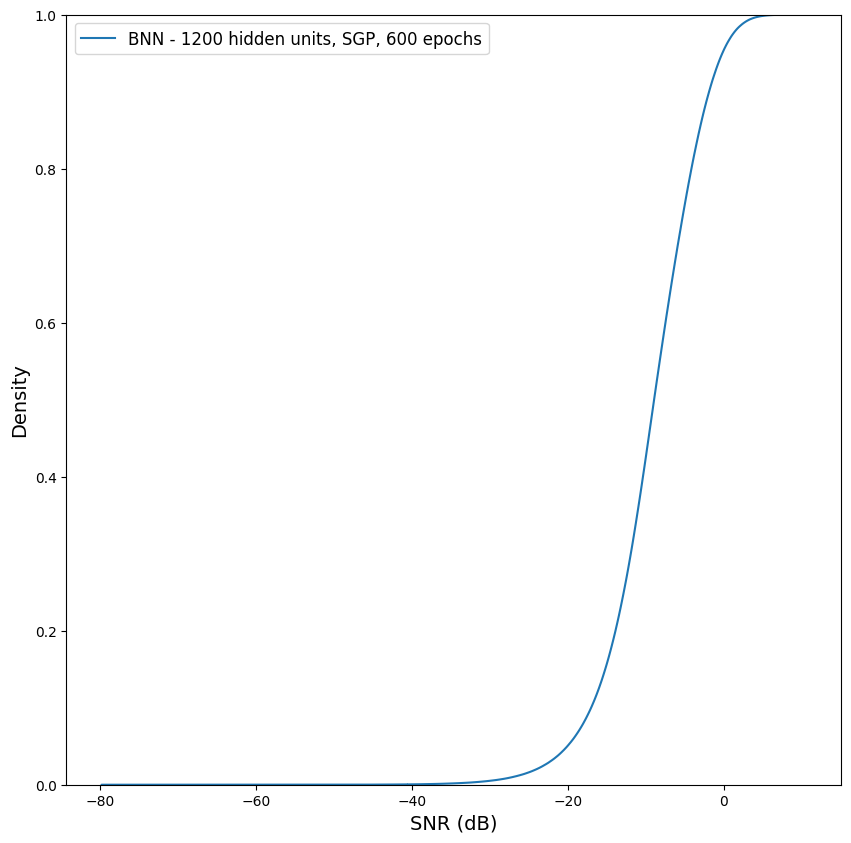

In [131]:
save_dir = "../plots/classification/pruning"
fig, ax = plt.subplots(1, 1, figsize=(10,10))

sns.ecdfplot(weight_snrs, ax=ax, label=f"{MODEL_DETAILS.description}")

# Formatting of plot
ax.set_xlabel('SNR (dB)', fontsize=14)
ax.set_ylabel('Density', fontsize=14)


ax.legend(loc='upper left', prop={'size': 12})
plt.savefig(os.path.join(save_dir, '1200_snr_weight_cdf.png'), pad_inches=0.2, bbox_inches='tight')
plt.show()

Text(0.5, 1.0, 'Weight Signal-to-Noise Ratio CDF')

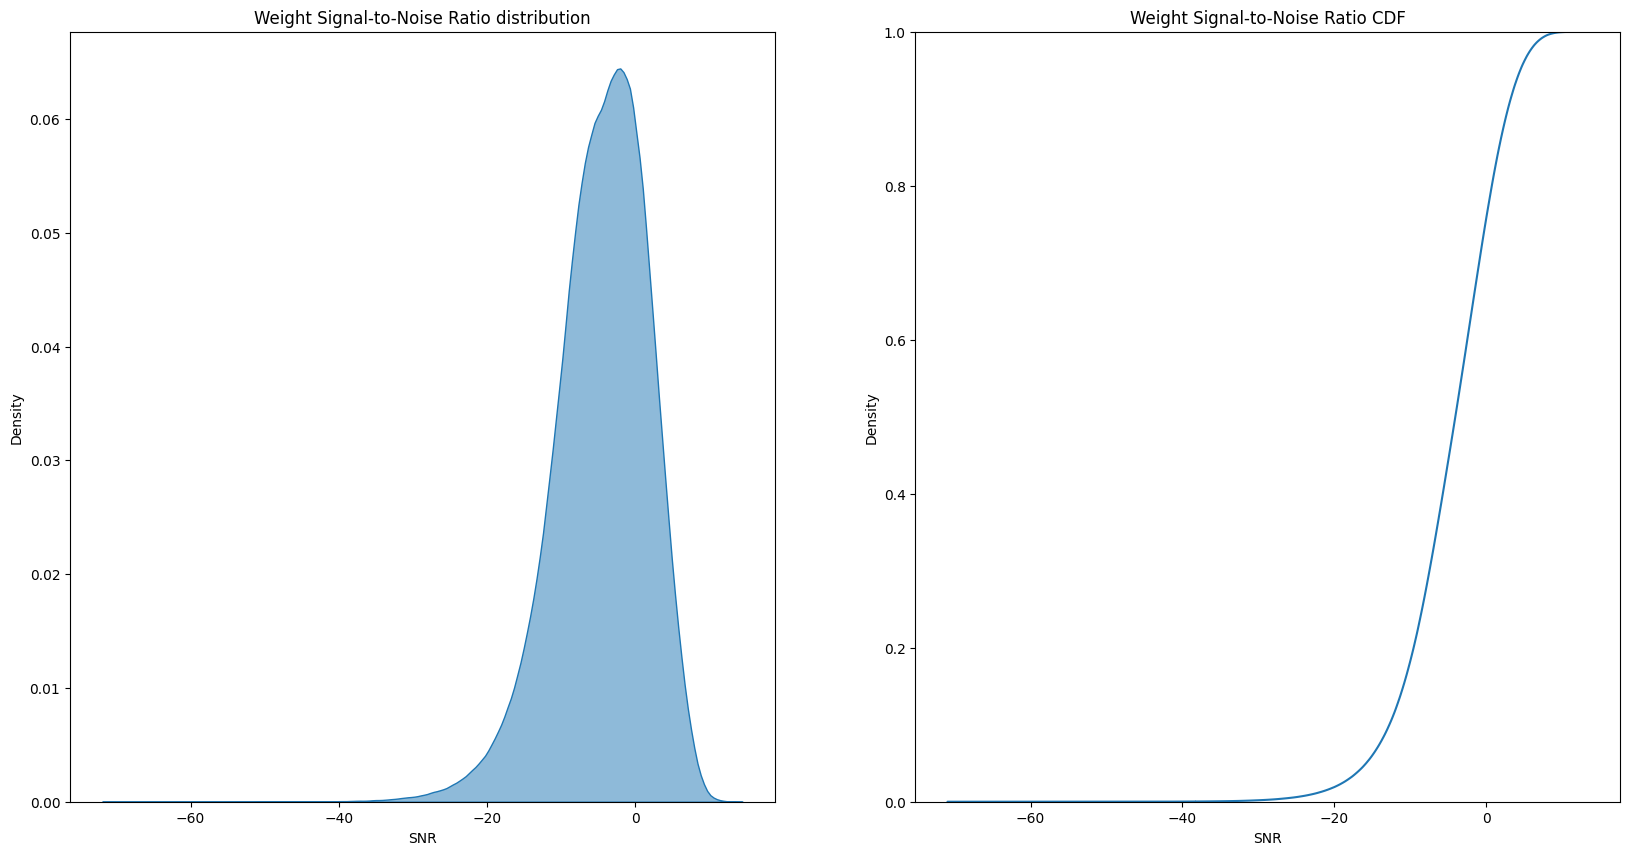

In [59]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
# ax.hist(weight_snrs, density=True, bins=50)
ax = axes[0]
ax1 = axes[1]

sns.kdeplot(weight_snrs, fill=True, ax=ax, alpha=0.5)
sns.ecdfplot(weight_snrs, ax=ax1)

# Formatting of plot
ax.set_xlabel('SNR')
ax.set_ylabel('Density')
ax.set_title('Weight Signal-to-Noise Ratio distribution')

ax1.set_xlabel('SNR')
ax1.set_ylabel('Density')
ax1.set_title('Weight Signal-to-Noise Ratio CDF')

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
# ax.hist(weight_snrs, density=True, bins=50)
sns.ecdfplot(weight_snrs, ax=ax)
ax.set_xlabel('SNR')
ax.set_ylabel('Density')
ax.set_title('Weight Signal-to-Noise Ratio CDF')

In [123]:
import ast
path = '../saved_models/BBB_classification/baseline/pruning_accuracy.txt'
f = open(path)
contents = f.read()
acc_dict = ast.literal_eval(contents)

In [149]:
# Includes 600 Epoch models
path = "../saved_models/BBB_classification/baseline/pruning_accuracy.pkl"
with open(path, 'rb') as f:
    acc_dict = pickle.load(f)

In [80]:
acc_dict = {}
for MODEL in MODEL_DETAILS_DICT.keys():
    acc_dict[MODEL] = {}
    
for MODEL in MODEL_DETAILS_DICT.keys():
    if MODEL.__contains__("bnn"):
        ### Load model
        net, params = load_model(MODEL)

        ### Get weights & SNRs
        weight_mean_tensors, weight_std_tensors = net.get_weights()
        weight_snr_tensors = [10*torch.log10(torch.abs(weight_mean_tensors[i])/weight_std_tensors[i]) for i in range(len(weight_mean_tensors))]
        weight_snrs = np.array([])
        for i in weight_snr_tensors:
            weight_snrs = np.hstack((weight_snrs, i.flatten().detach().numpy()))

        ### Run Pruning 
        # quantile_thresholds = np.linspace(0,1,20) # 
        quantile_thresholds = [0.0, 0.25, 0.50, 0.75, 0.80, 0.85, 0.90, 0.95, 1.0]
        weight_mean_tensors, weight_std_tensors = net.get_weights()
        weight_snr_tensors = [10*torch.log10(torch.abs(weight_mean_tensors[i])/weight_std_tensors[i]) for i in range(len(weight_mean_tensors))]

        accuracies = []
        prune_ratios = {}
        prune_ratios['1L'] = []
        prune_ratios['2L'] = []
        prune_ratios['3L'] = []

        for snr in quantile_thresholds:
            snr_threshold = np.quantile(weight_snrs, snr)
            weight_fill_masks = [weight_snr_tensors[i] < snr_threshold for i in range(len(weight_snr_tensors))]

            net.prune_weights(weight_fill_masks) # order from 0.05 to 1.0 means that don't have to reset the weights before pruning them (as each threshold is a superset of the last threshold)

            accuracy = net.evaluate(X_val)
            accuracies.append(accuracy)
            
            pruned_weight_samples = net.get_pruned_weight_samples(weight_fill_masks)
            
            # Print pruning ratio per layer
            for i, (x, layer) in enumerate(zip(pruned_weight_samples, [layer for layer in net.model if isinstance(layer, BaseBFC)])):
                num_non_pruned_weights = int(x.size()[0]/net.inference_samples)
                num_weights = layer.dim_in * layer.dim_out
                prune_ratio = 1 - num_non_pruned_weights/num_weights
                prune_ratios[list(prune_ratios.keys())[i]].append(prune_ratio)
            
        acc_dict[MODEL]['accuracies'] = accuracies
        acc_dict[MODEL]['prune_ratios'] = prune_ratios

2022-03-30 01:43:26,020 - bbb.models.layers - INFO - Weights Prior: Gaussian with mean 0 and variance 1.0
2022-03-30 01:43:26,020 - bbb.models.layers - INFO - Biases Prior: Gaussian with mean 0 and variance 1.0
2022-03-30 01:43:26,030 - bbb.models.layers - INFO - Weights Prior: Gaussian with mean 0 and variance 1.0
2022-03-30 01:43:26,031 - bbb.models.layers - INFO - Biases Prior: Gaussian with mean 0 and variance 1.0
2022-03-30 01:43:26,033 - bbb.models.layers - INFO - Weights Prior: Gaussian with mean 0 and variance 1.0
2022-03-30 01:43:26,033 - bbb.models.layers - INFO - Biases Prior: Gaussian with mean 0 and variance 1.0
2022-03-30 01:49:37,087 - bbb.models.layers - INFO - Weights Prior: Gaussian with mean 0 and variance 1.0
2022-03-30 01:49:37,087 - bbb.models.layers - INFO - Biases Prior: Gaussian with mean 0 and variance 1.0
2022-03-30 01:49:37,092 - bbb.models.layers - INFO - Weights Prior: Gaussian with mean 0 and variance 1.0
2022-03-30 01:49:37,092 - bbb.models.layers - INFO

In [81]:
for model in list(acc_dict.keys()):
    if model.__contains__("dnn"): del acc_dict[model]
    else:
        for idx, a in enumerate(acc_dict[model]['accuracies']):
            acc_dict[model]['accuracies'][idx] = a.item()

In [82]:
path = "../saved_models/BBB_classification/baseline/pruning_accuracy.pkl"
with open(path, 'w+b') as f:
    pickle.dump(acc_dict, f)
        
# with open(path, 'rb') as f:
#     acc_dict = pickle.load(f)

Save distribution of pruned weights across layers

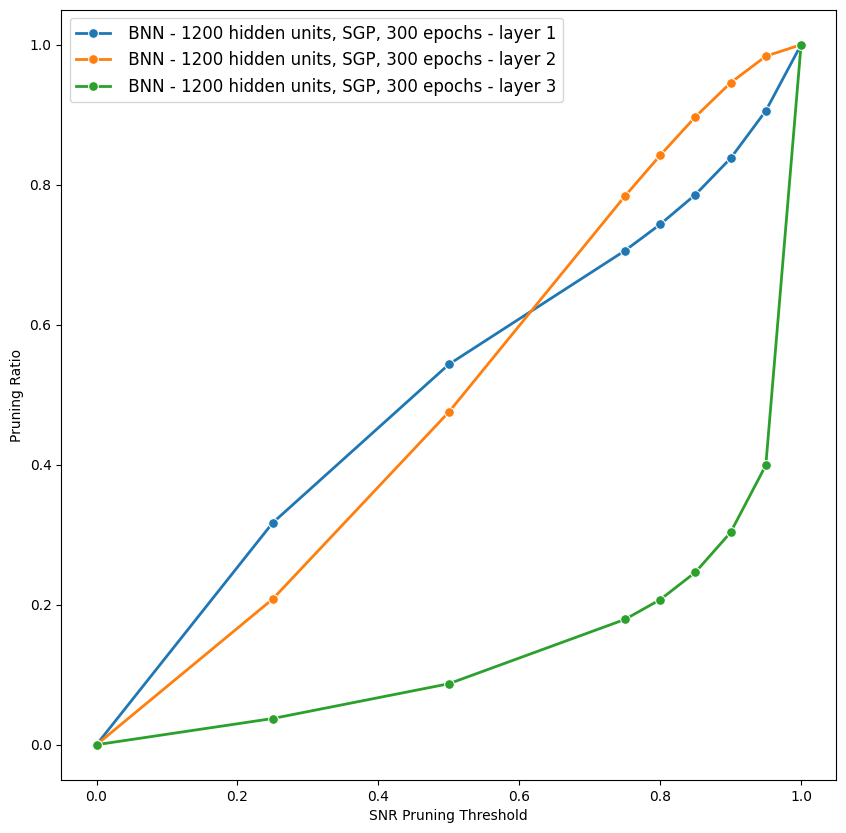

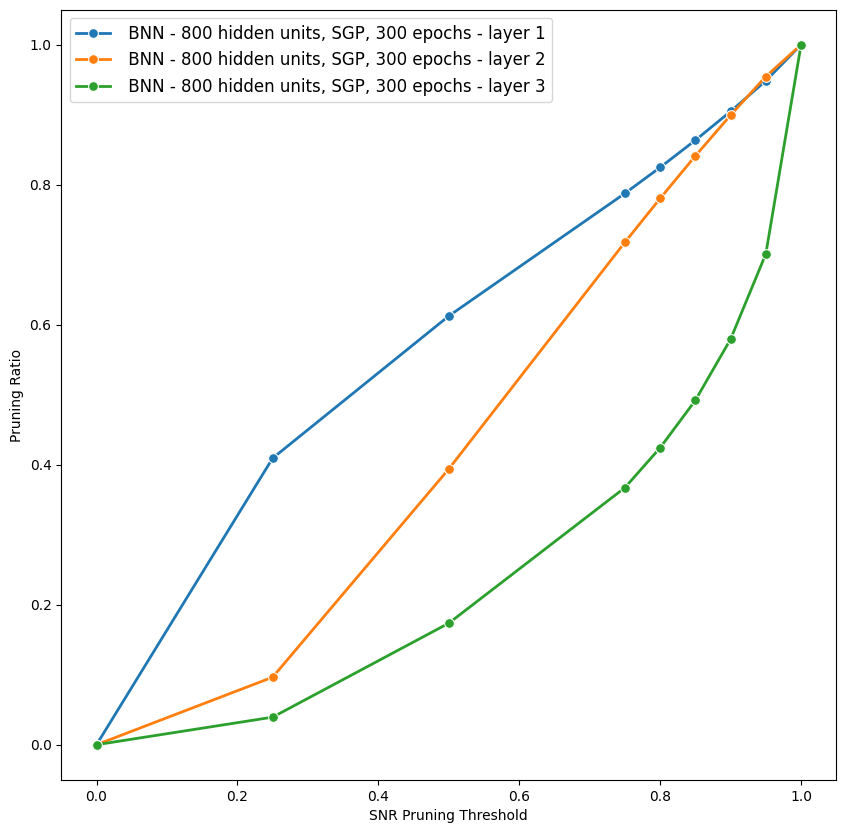

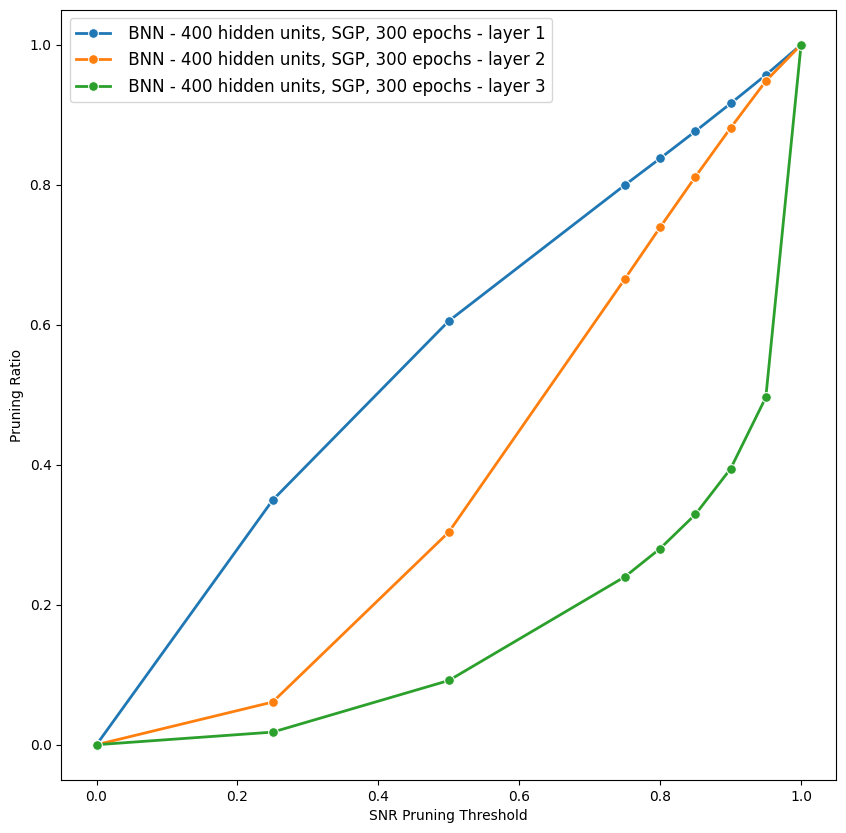

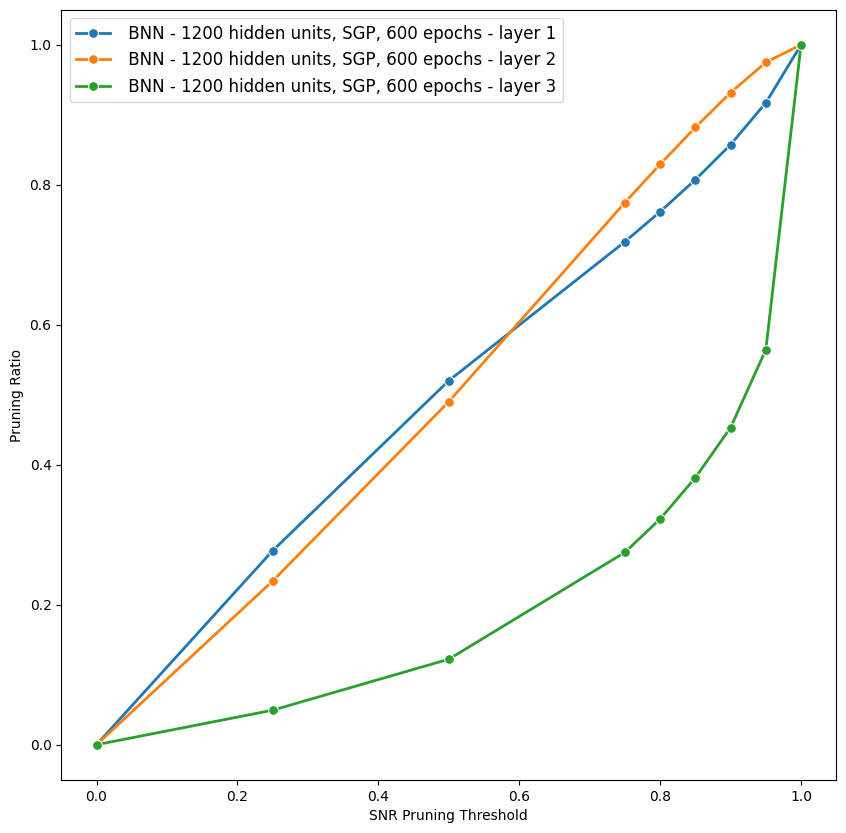

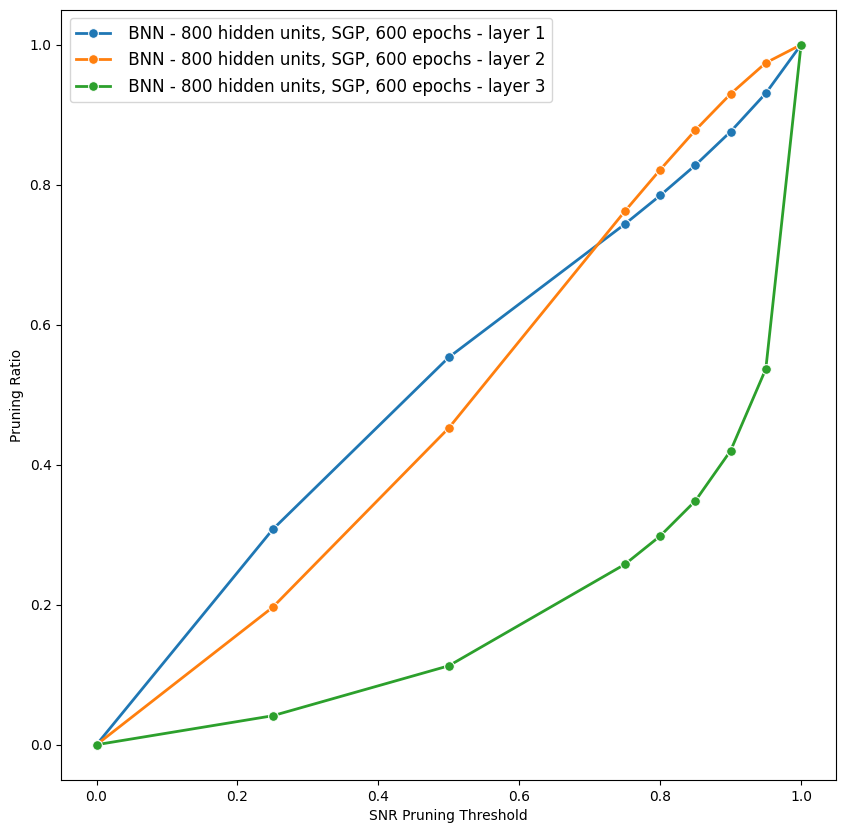

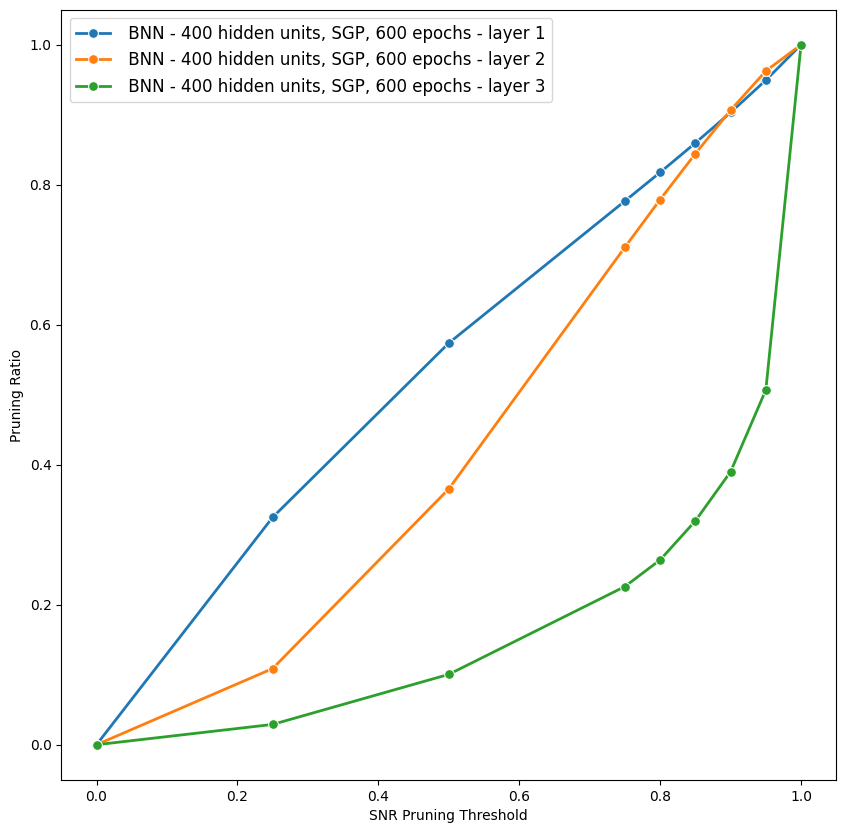

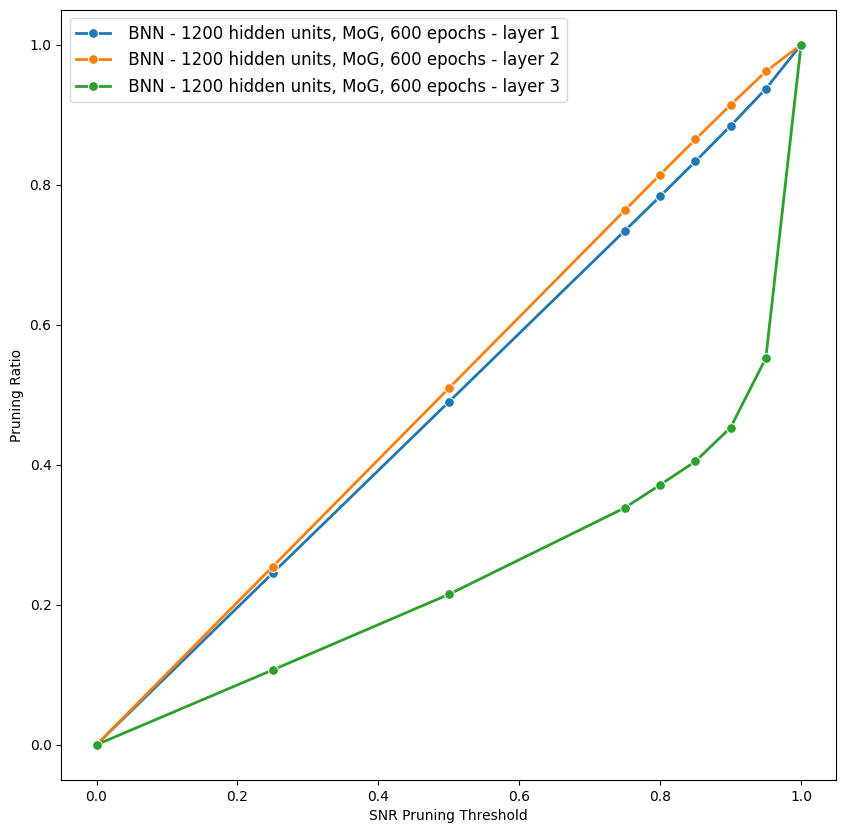

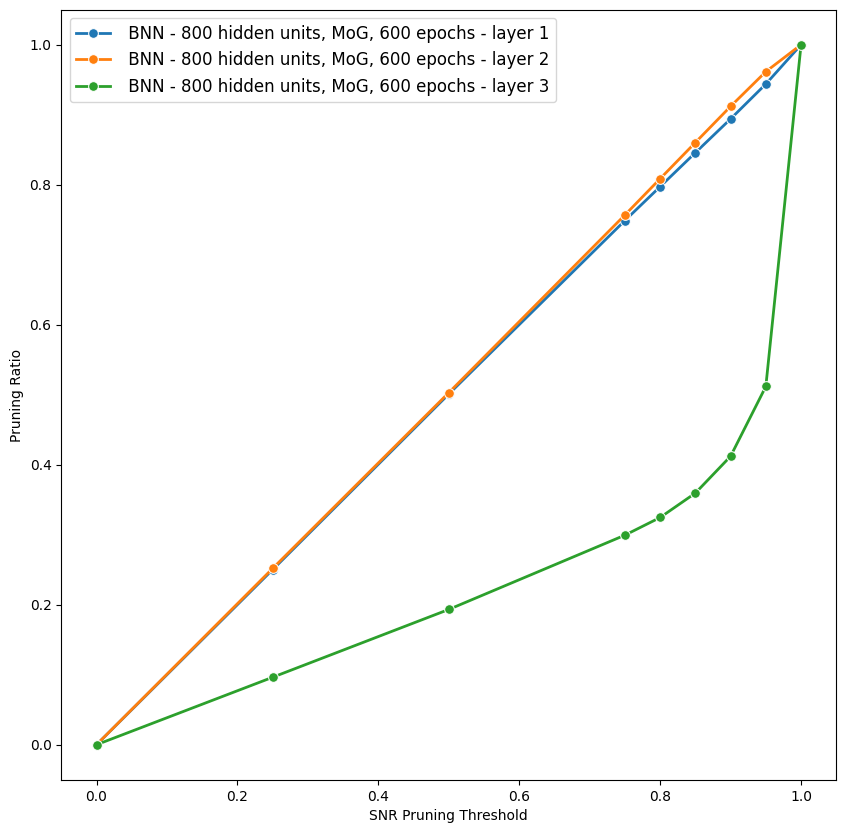

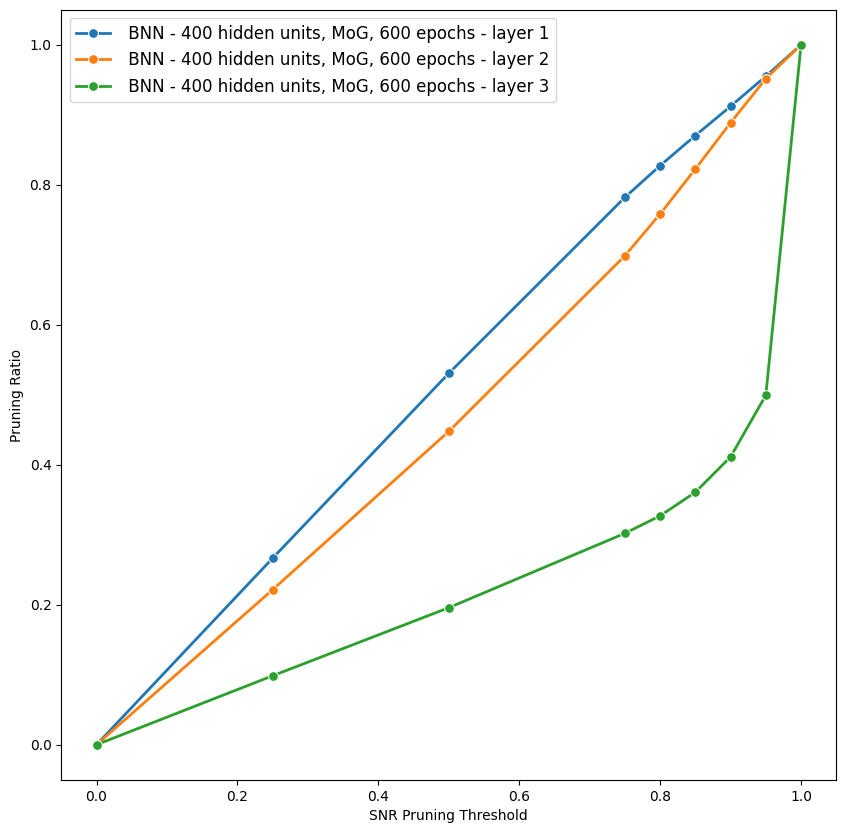

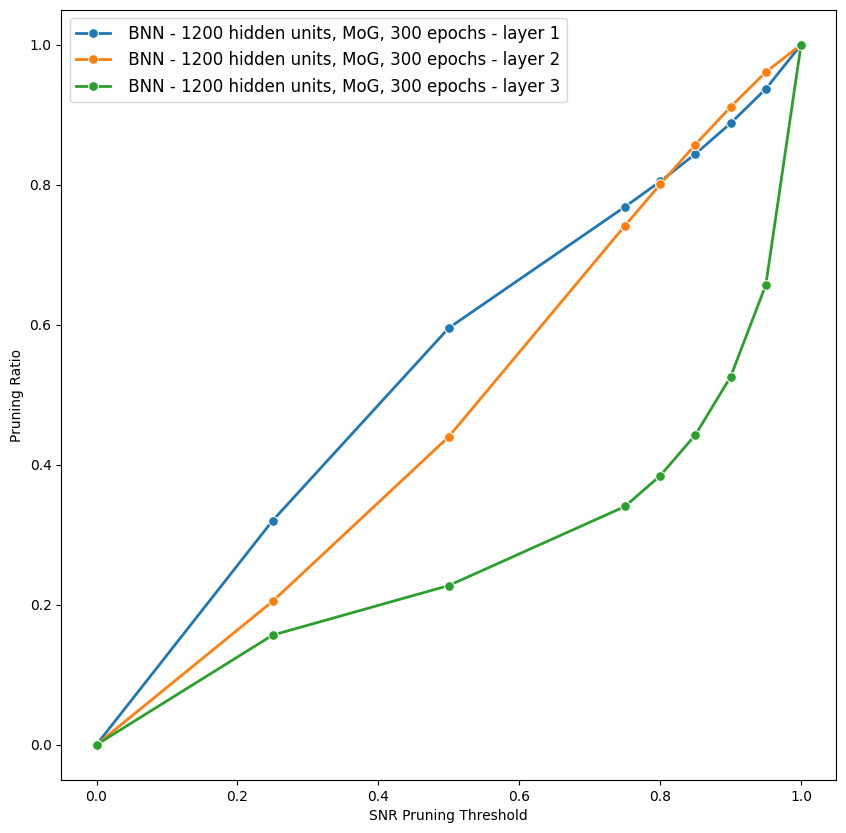

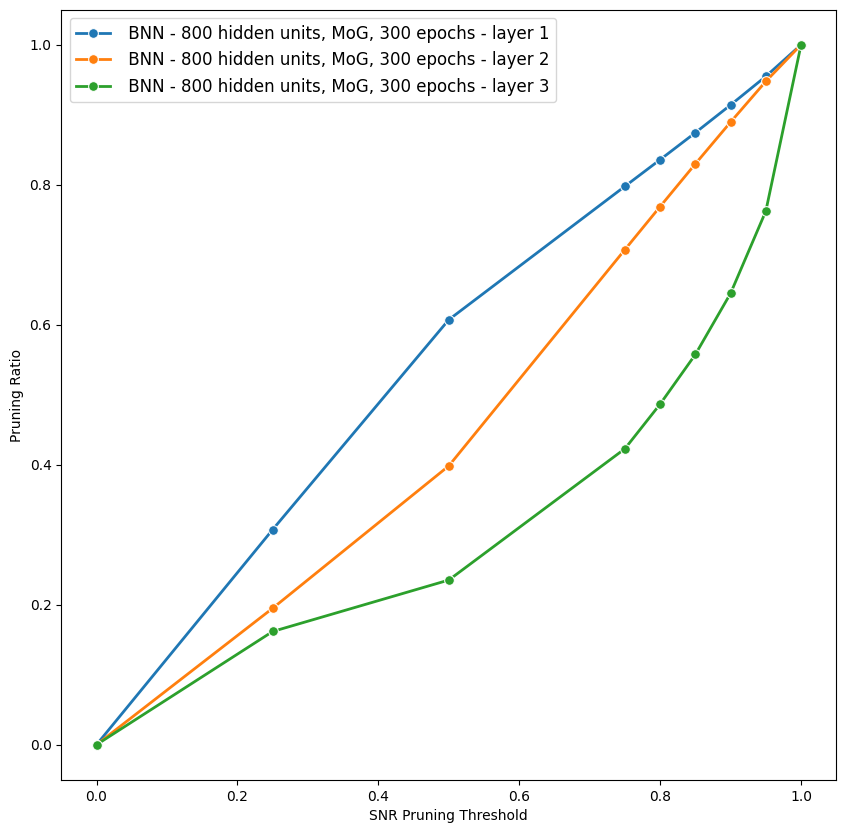

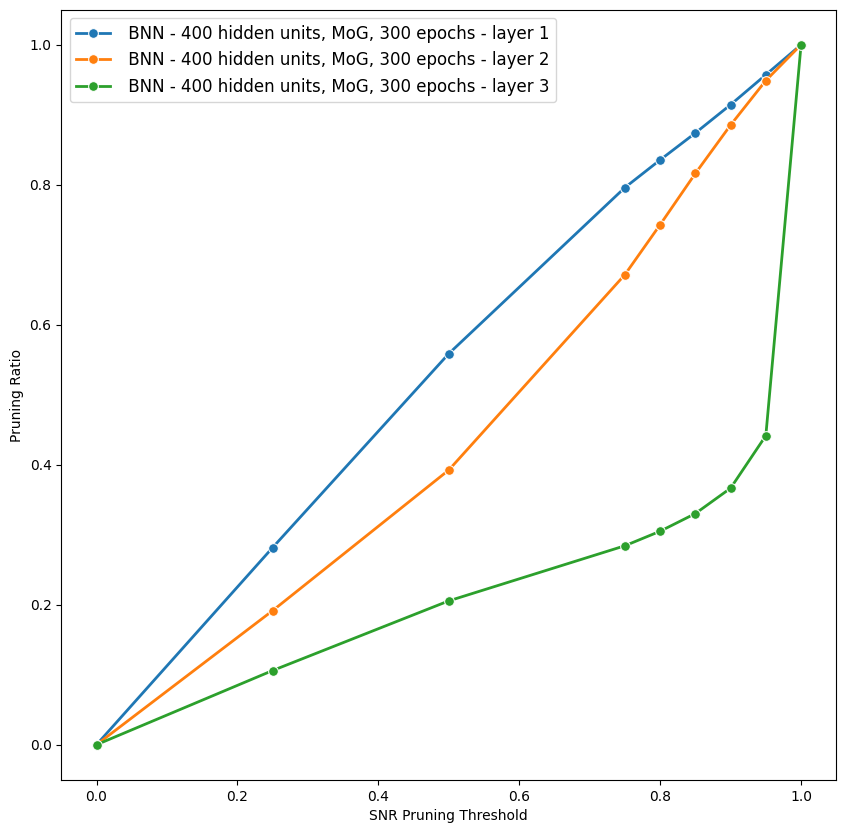

In [83]:
save_dir = "../plots/classification/pruning"
for model in acc_dict.keys():
    if not model.__contains__("bnn"): continue
    description = MODEL_DETAILS_DICT[model].description
    accuracies = acc_dict[model]['accuracies']
    prune_ratios = acc_dict[model]['prune_ratios']

    fig, ax = plt.subplots(1, 1, figsize=(10,10))
    lw = 2
    ms = 7
    for layer in prune_ratios.keys():
        sns.lineplot(y=prune_ratios[layer], x=quantile_thresholds, label=f" {description} - layer {layer[0]}", ax=ax, linewidth=lw, marker="o", markersize=ms)

    # Formatting of plot
    ax.set_xlabel('SNR Pruning Threshold')
    ax.set_ylabel('Pruning Ratio')
    # ax.set_title(f'{description} Weight Pruning Distribution')
    ax.legend(loc='upper left', prop={'size': 12})

    plt.savefig(os.path.join(save_dir, f'{model}_pruning_weight_dist.png'), pad_inches=0.2, bbox_inches='tight')

    # plt.show()

Plot accuracy vs threshold for all BNN models in one plot

bnn_sgp_1200
bnn_sgp_600_1200
bnn_mog_600_1200
bnn_mog_1200


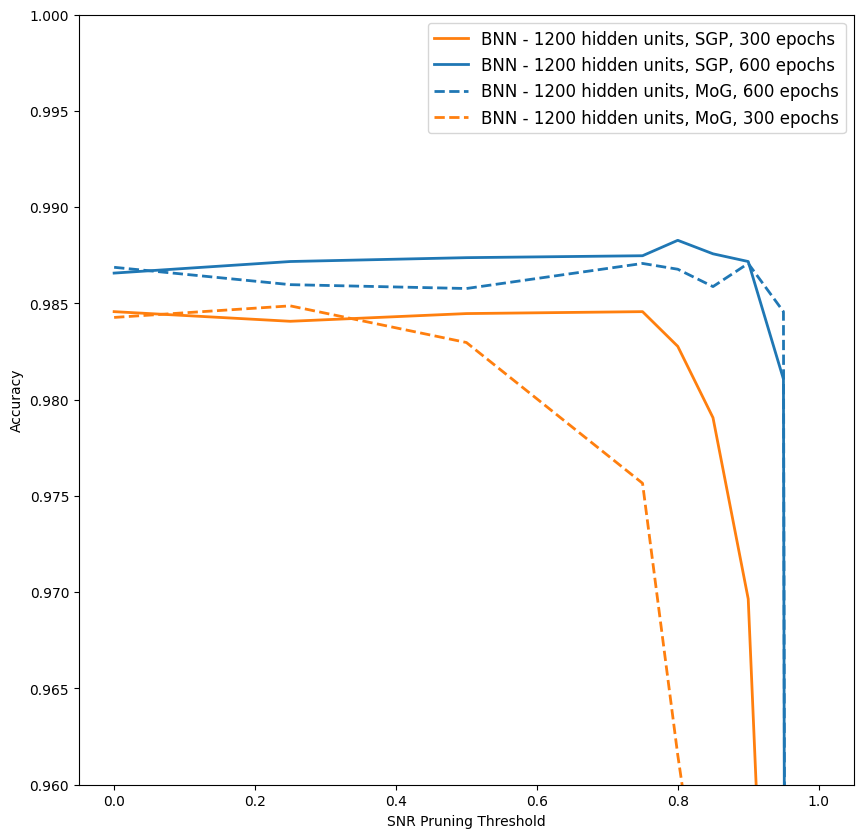

In [104]:
save_dir = "../plots/classification/pruning"
fig, ax = plt.subplots(1, 1, figsize=(10,10))

# model_order = ['bnn_sgp_400','bnn_sgp_800', 'bnn_sgp_1200', 'bnn_sgp_600_1200', 'bnn_mog_400', 'bnn_mog_800', 'bnn_mog_1200', 'bnn_mog_600_1200']
for idx, model in enumerate(MODEL_DETAILS_DICT.keys()):
    if not model.__contains__("bnn"): continue
    elif not model.__contains__("1200"): continue
    description = MODEL_DETAILS_DICT[model].description
    accuracies = acc_dict[model]['accuracies']
    prune_ratios = acc_dict[model]['prune_ratios']
    
    lw = 2
    ms = 0
    if model.__contains__("600"): color = colors[0]
    if not model.__contains__("600"): color = colors[1]
    
    print(model)
    # elif model.__contains__("800"):
    #     color = colors[1]
    # elif model.__contains__("400"):
    #     color = colors[2]
    
    # if model.__contains__("600"): # 600 epochs => separate color
    #     color = colors[3]
    
    if model.__contains__("mog"):
        sns.lineplot(y=accuracies, x=quantile_thresholds, label=f"{description}", ax=ax, color=color,linestyle='--', linewidth=lw, marker="o", markersize=ms)
    else:
        sns.lineplot(y=accuracies, x=quantile_thresholds, label=f"{description}", ax=ax, color=color,linewidth=lw, marker="o", markersize=ms)

    # Formatting of plot
    ax.set_xlabel('SNR Pruning Threshold')
    ax.set(ylim=(0.96, 1.0))
    ax.set_ylabel('Accuracy')
    # ax.set_title('Pruned BNN Accuracy')
    # labelLines(ax.get_lines()[:-1], zorder=2.5, backgroundcolor="none")


    ax.legend(loc='upper right', prop={'size': 12})
plt.savefig(os.path.join(save_dir, '1200_accuracy_pruning_plot.png'), pad_inches=0.2, bbox_inches='tight')
plt.show()

# Test loss plot (Paper reprod)

In [106]:
from model_details import MODEL_DETAILS_DICT, load_model, ModelDetails


2022-03-30 15:25:53,163 - bbb.models.layers - INFO - Weights Prior: Gaussian mixture with means (0, 0), variances (1.0, 0.0009118819655545162) and weight 0.5
2022-03-30 15:25:53,163 - bbb.models.layers - INFO - Biases Prior: Gaussian mixture with means (0, 0), variances (1.0, 0.0009118819655545162) and weight 0.5
2022-03-30 15:25:53,174 - bbb.models.layers - INFO - Weights Prior: Gaussian mixture with means (0, 0), variances (1.0, 0.0009118819655545162) and weight 0.5
2022-03-30 15:25:53,175 - bbb.models.layers - INFO - Biases Prior: Gaussian mixture with means (0, 0), variances (1.0, 0.0009118819655545162) and weight 0.5
2022-03-30 15:25:53,176 - bbb.models.layers - INFO - Weights Prior: Gaussian mixture with means (0, 0), variances (1.0, 0.0009118819655545162) and weight 0.5
2022-03-30 15:25:53,176 - bbb.models.layers - INFO - Biases Prior: Gaussian mixture with means (0, 0), variances (1.0, 0.0009118819655545162) and weight 0.5


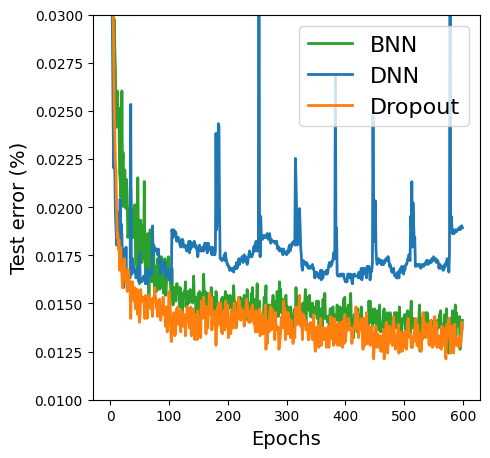

In [140]:
save_dir = "../plots/classification/"
fig, ax = plt.subplots(1, 1, figsize=(5,5))

models = ['bnn_sgp_600_1200_every', 'dnn_600_1200', 'dnn_do_600_1200']
for idx, model in enumerate(models):
    MODEL_DETAILS = MODEL_DETAILS_DICT[model]
    description = MODEL_DETAILS.description
    net, params = load_model(model)
    
    test_errors = 1 - np.load(os.path.join(MODEL_DETAILS.dir, 'eval_metric.npy'))
    lw = 2

    # Account for the reduction of eval() calls in 600 epoch run to only every 20 epochs
    # xs = [i*20 for i in range(len(test_errors))] if model.__contains__("bnn") else [i for i in range(len(test_errors))]
    xs = [i for i in range(len(test_errors))]
    if model.__contains__("bnn"): color = colors[2]
    elif model.__contains__("do"): color = colors[1]
    else: color = colors[0]
    
    sns.lineplot(y=test_errors, x=xs, label=f"{description.split(' ')[0]}", ax=ax, color=color,linewidth=lw)

    # Formatting of plot
    ax.set_xlabel('Epochs', fontsize=14)
    ax.set(ylim=(0.010, 0.030))
    ax.set_ylabel('Test error (%)', fontsize=14)
    # ax.set_title('Pruned BNN Accuracy')
    # labelLines(ax.get_lines()[:-1], zorder=2.5, backgroundcolor="none")

    ax.legend(loc='upper right', prop={'size': 16})
plt.savefig(os.path.join(save_dir, 'test_error_plot.png'), pad_inches=0.2, bbox_inches='tight')
plt.show()

## Old

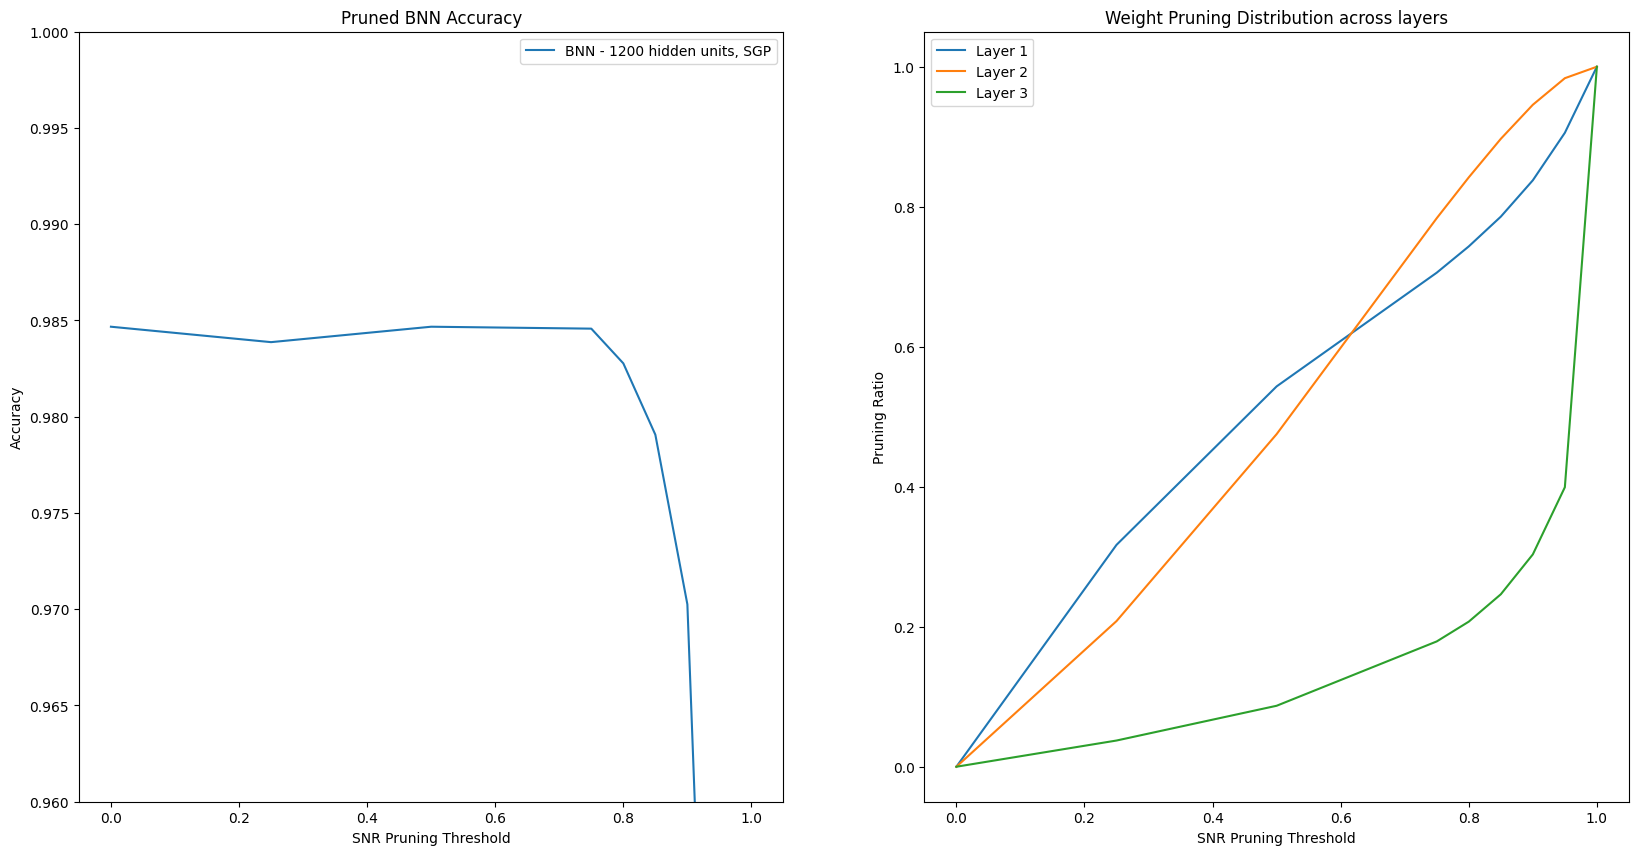

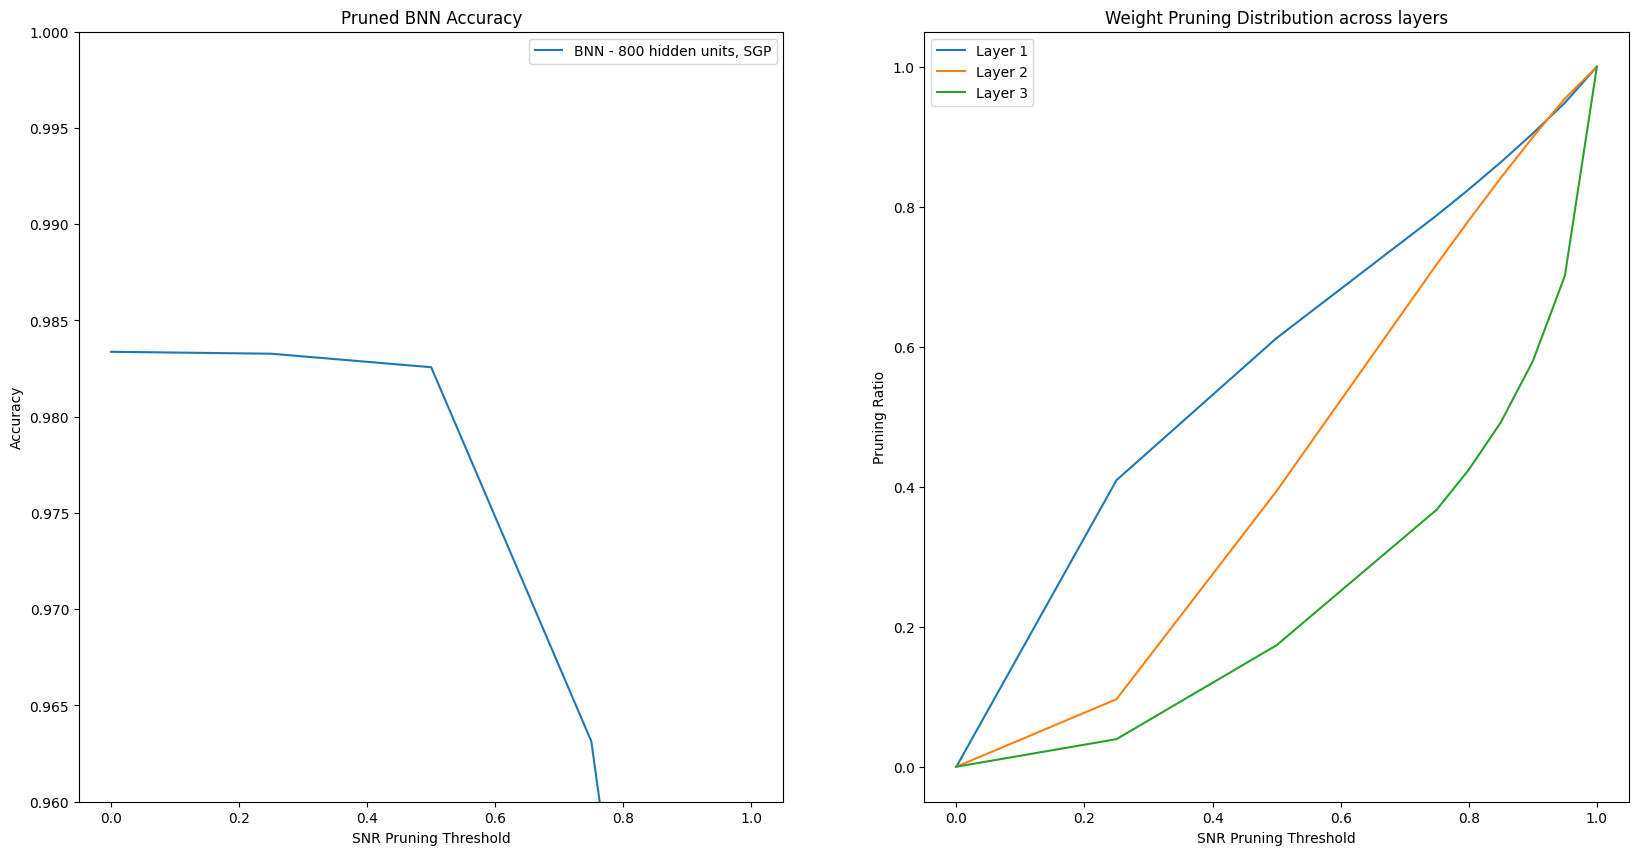

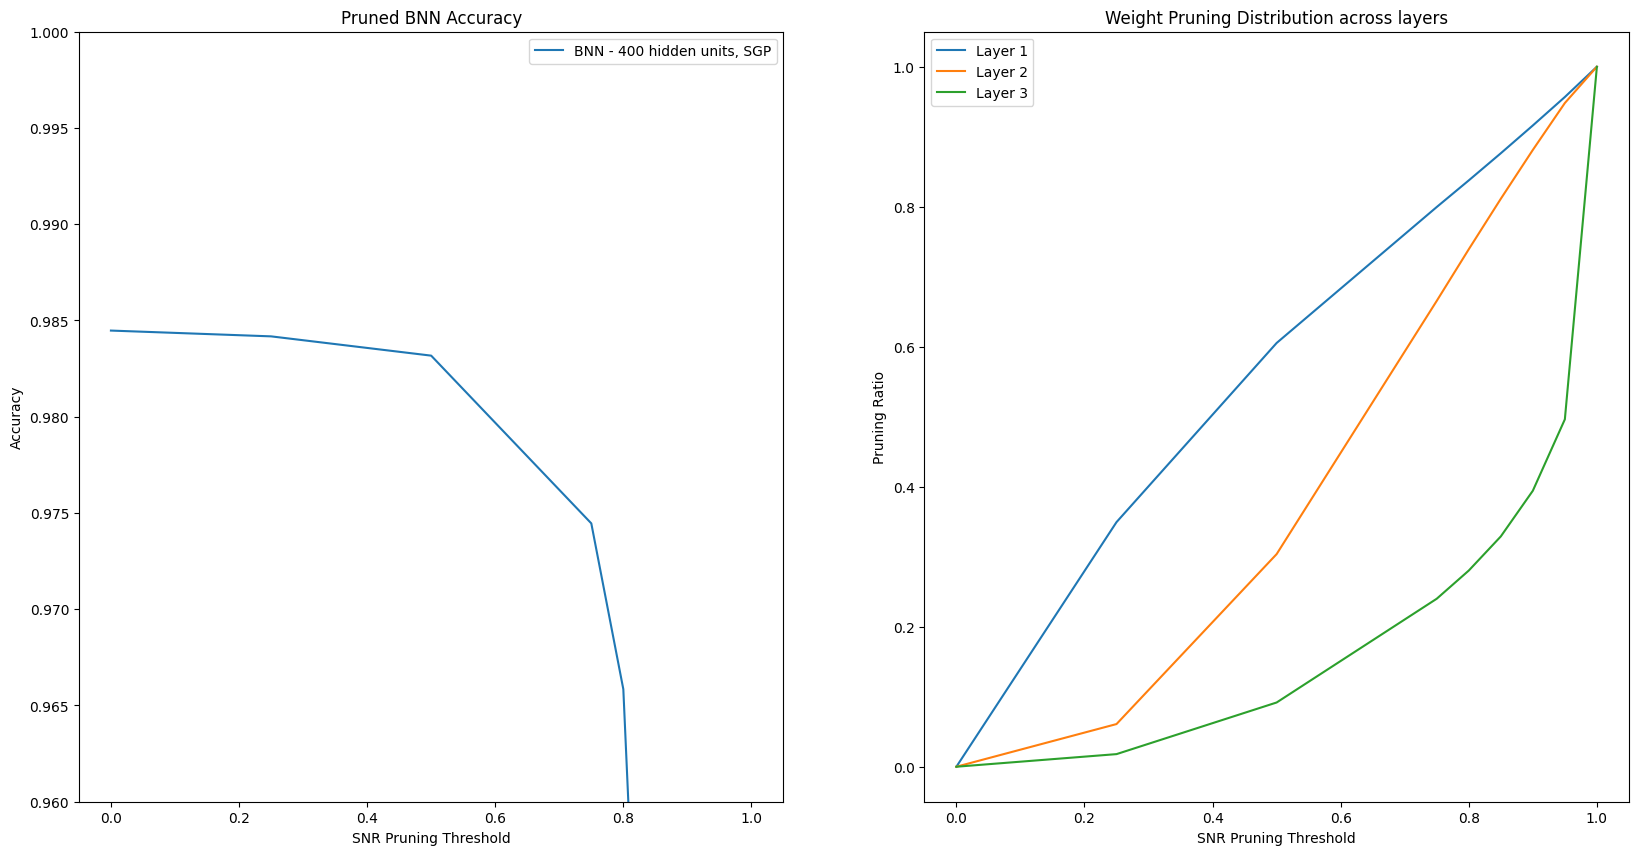

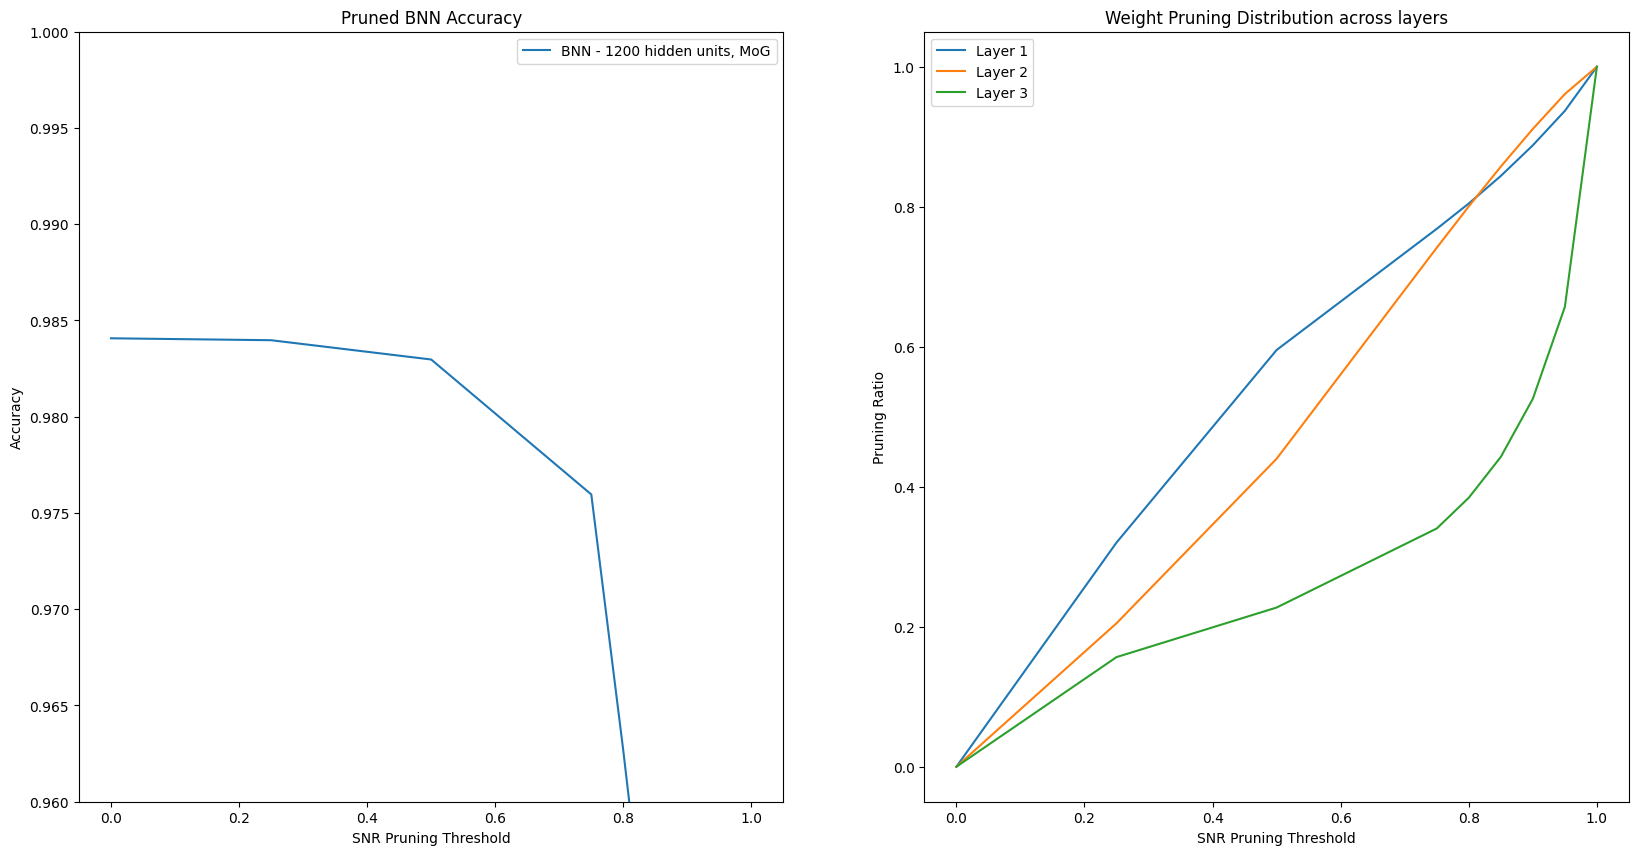

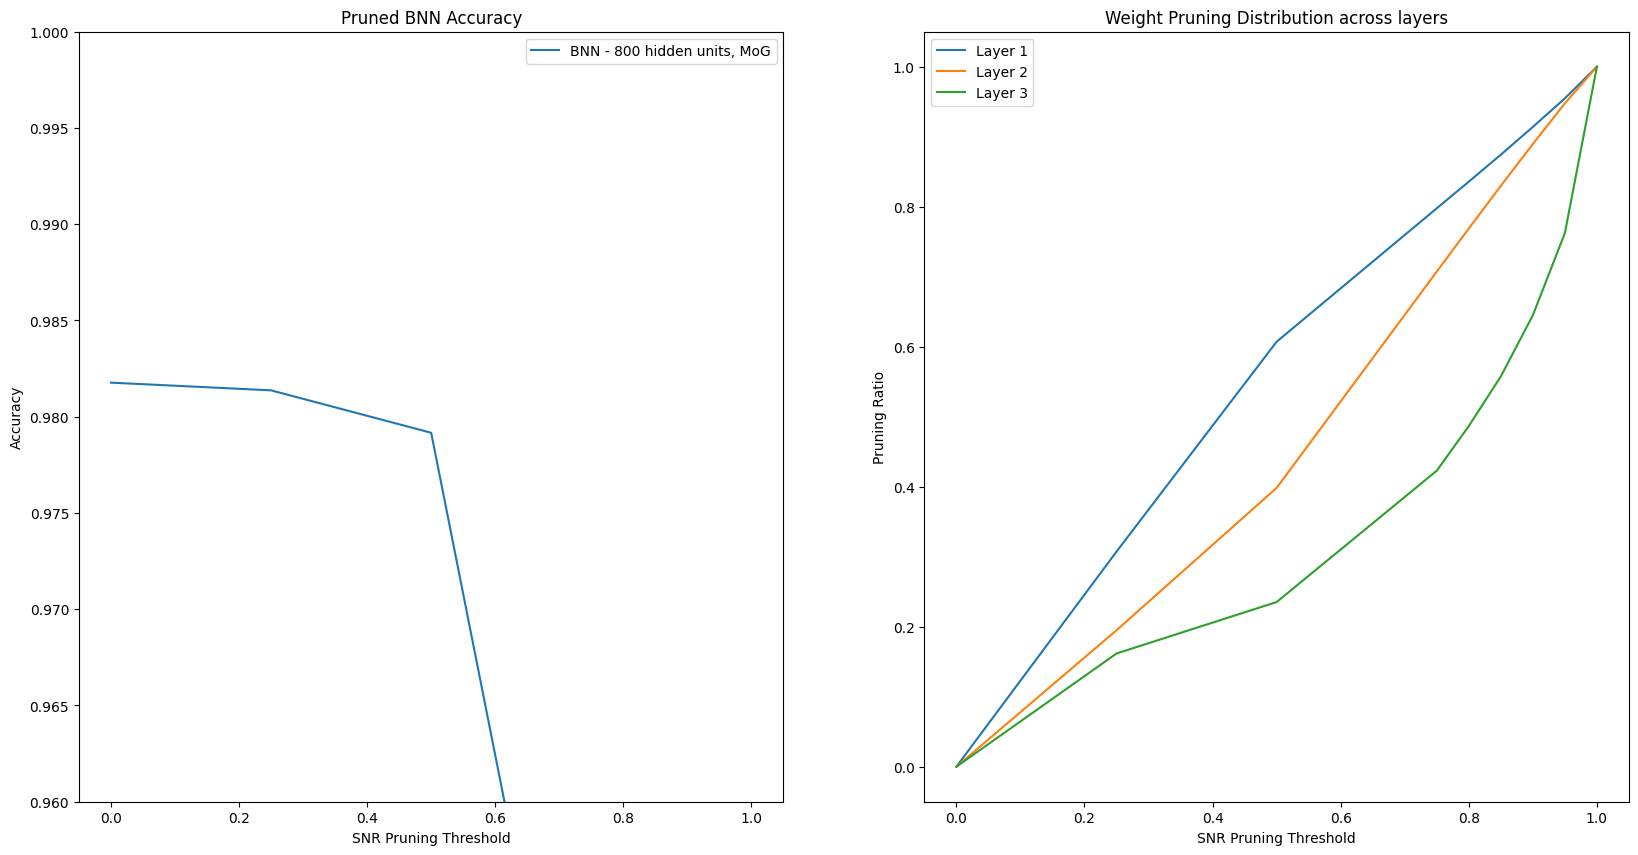

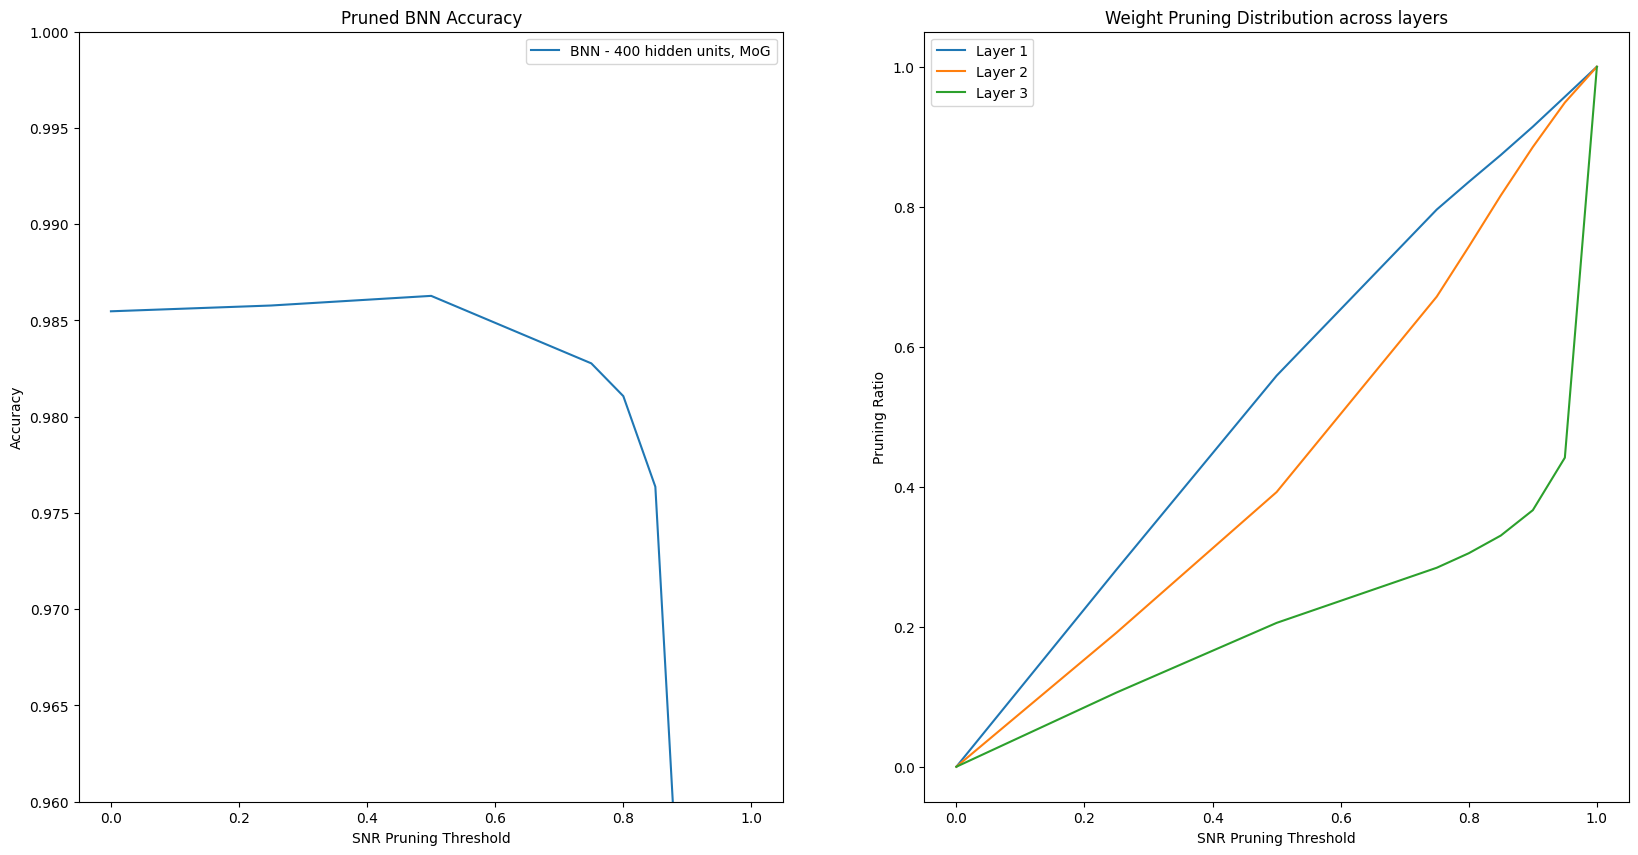

In [22]:
save_dir = "../plots/classification/"
for model in acc_dict.keys():
    if not model.__contains__("bnn"): continue
    description = MODEL_DETAILS_DICT[model].description
    accuracies = acc_dict[model]['accuracies']
    prune_ratios = acc_dict[model]['prune_ratios']

    fig, axes = plt.subplots(1, 2, figsize=(20,10))
    ax = axes[0]
    ax1 = axes[1]

    sns.lineplot(y=[float(x.detach().numpy()) for x in accuracies], x=quantile_thresholds, label=f"{description}", ax=ax)
    # for layer in prune_ratios.keys():
    #     sns.lineplot(y=prune_ratios[layer], x=quantile_thresholds, label=f"Layer {layer[0]}", ax=ax1)

    # Formatting of plot
    ax.set_xlabel('SNR Pruning Threshold')
    ax.set(ylim=(0.96, 1.0))
    ax.set_ylabel('Accuracy')
    ax.set_title('Pruned BNN Accuracy')

    ax1.set_xlabel('SNR Pruning Threshold')
    ax1.set_ylabel('Pruning Ratio')
    ax1.set_title('Weight Pruning Distribution across layers')

    plt.show()

In [ ]:
plot_weight_samples(pruned_weight_samples)

In [22]:
net.evaluate(X_val)

tensor(0.9840)

In [20]:
eval_dict = evaluate_classifier(net, X_val)
eval_dict['eval_score']

tensor(0.9845)

## Analyse Multiple Models

### Evaluation

In [43]:
models = ['bnn_sgp_600_1200', 'dnn_do_600_1200', 'dnn_600_1200']
model_dict = {}

for model in models:
    
    net, params = load_model(model)

    model_dict[model] = evaluate_classifier(net, X_val)
    print('{}: {}'.format(model, model_dict[model]['eval_score']))

2022-03-29 20:58:52,401 - bbb.models.layers - INFO - Weights Prior: Gaussian with mean 0 and variance 1.0
2022-03-29 20:58:52,402 - bbb.models.layers - INFO - Biases Prior: Gaussian with mean 0 and variance 1.0
2022-03-29 20:58:52,412 - bbb.models.layers - INFO - Weights Prior: Gaussian with mean 0 and variance 1.0
2022-03-29 20:58:52,412 - bbb.models.layers - INFO - Biases Prior: Gaussian with mean 0 and variance 1.0
2022-03-29 20:58:52,413 - bbb.models.layers - INFO - Weights Prior: Gaussian with mean 0 and variance 1.0
2022-03-29 20:58:52,414 - bbb.models.layers - INFO - Biases Prior: Gaussian with mean 0 and variance 1.0


bnn_sgp_600_1200: 0.9862780570983887
dnn_do_600_1200: 0.9862780570983887
dnn_600_1200: 0.9810696840286255


In [44]:
# Create list of maximum confidence score for each guess
for model in models:
    dict = model_dict[model]

    for i in dict['probs']['incorrect']['all']:
        dict['probs']['incorrect']['max'].append(np.max(i))

    for i in dict['probs']['correct']['all']:
        dict['probs']['correct']['max'].append(np.max(i))

    model_dict[model]['probs']['max'] = np.array(model_dict[model]['probs']['max']).flatten()

Plot weight distribution 


2022-03-29 21:01:18,055 - bbb.models.layers - INFO - Weights Prior: Gaussian with mean 0 and variance 1.0
2022-03-29 21:01:18,055 - bbb.models.layers - INFO - Biases Prior: Gaussian with mean 0 and variance 1.0
2022-03-29 21:01:18,066 - bbb.models.layers - INFO - Weights Prior: Gaussian with mean 0 and variance 1.0
2022-03-29 21:01:18,066 - bbb.models.layers - INFO - Biases Prior: Gaussian with mean 0 and variance 1.0
2022-03-29 21:01:18,067 - bbb.models.layers - INFO - Weights Prior: Gaussian with mean 0 and variance 1.0
2022-03-29 21:01:18,067 - bbb.models.layers - INFO - Biases Prior: Gaussian with mean 0 and variance 1.0


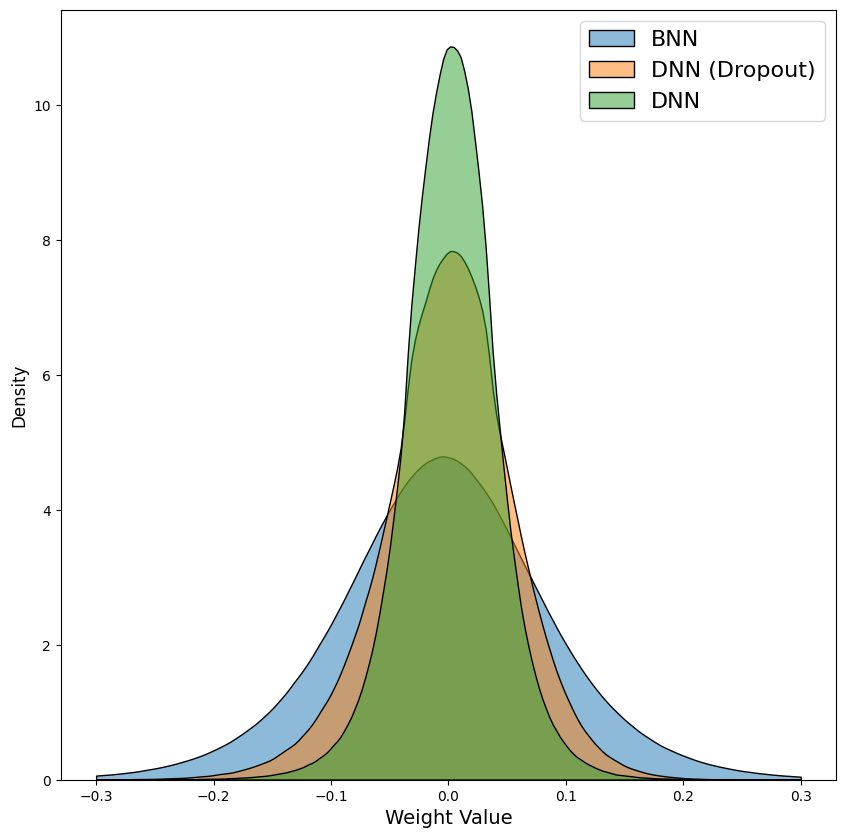

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
# Formatting of plot
ax.set_xlabel('Weight Value', fontsize=14)
ax.set_ylabel('Density', fontsize=12)
# ax.set_xlabel('Weight Value')
# ax.set_ylabel('Density')

models = ['bnn_sgp_600_1200', 'dnn_do_600_1200', 'dnn_600_1200']
for idx, model in enumerate(models):
    net, params = load_model(model)

    weight_samples = net.weight_samples()

    comb_weight_samples = torch.hstack(weight_samples)
    sns.kdeplot(comb_weight_samples.flatten().detach().cpu().numpy(), fill=True, clip=[-0.3, 0.3], ax=ax, color=colors[idx], alpha=0.5, multiple="stack")
    # ax.hist(comb_weight_samples.flatten().detach().cpu().numpy(), **histogram_args)

    
# Display the plot
ax.legend(['BNN', 'DNN (Dropout)', 'DNN'], loc='upper right', prop={'size':16})
plt.savefig(os.path.join("../plots/classification/comb_weights_plot_600_1200.png"), pad_inches=0.2, bbox_inches='tight')
plt.show()

Plot reliability diagram

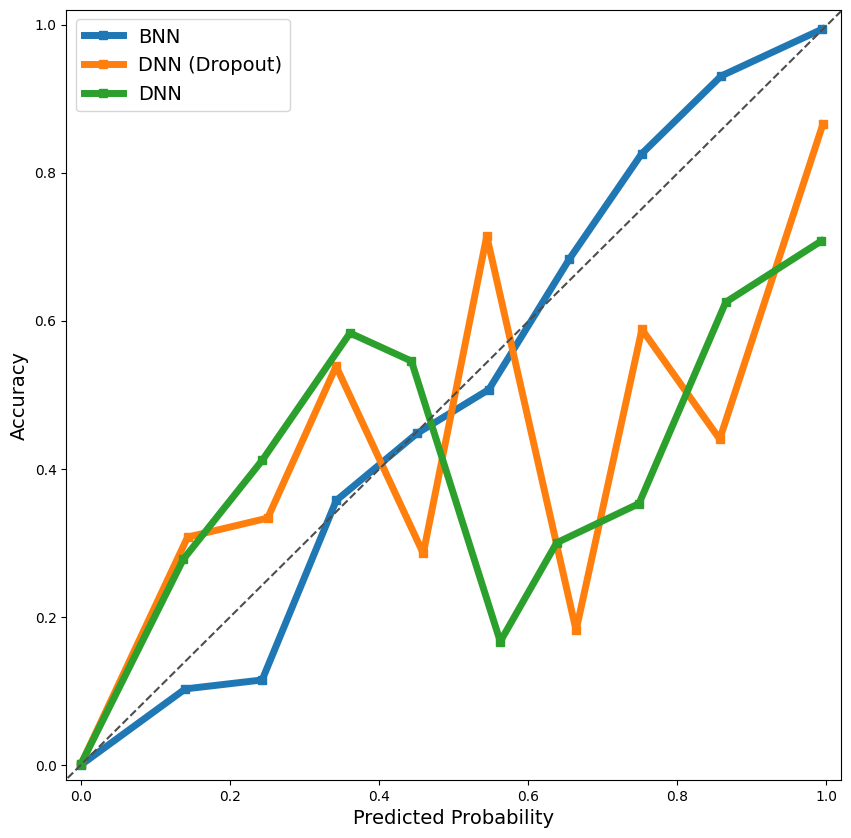

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
for idx, model in enumerate(models):

    probs = model_dict[model]['probs']['all']
    conf = model_dict[model]['probs']['max']
    preds = model_dict[model]['preds']['all']
    labels = model_dict[model]['labels']
    
    bins = 10
    B = {}
    for i in range(bins+1):
        B[i] = [0,0,0]

    pred_prob = np.array(probs)
    for n in range(np.shape(preds)[0]):
        for d in range(np.max(labels)+1):
            whichBin = int(pred_prob[n][d]*bins)
            B[whichBin][0] += 1
            if d == labels[n]: B[whichBin][1] += 1
            B[whichBin][2] += pred_prob[n][d]

    correct = []
    predicted = []
    for i in range(bins):
        correct.append(B[i][1]/B[i][0])
        predicted.append(B[i][2]/B[i][0])


    ax.plot(predicted, correct, 's-', linewidth=5,
             label="{}".format(model), color=colors[idx])

ax.legend(['BNN', 'DNN (Dropout)', 'DNN'], loc='upper left', prop={'size':14})
ax.plot(plt.xlim(), plt.ylim(), ls="--", c=".3")
ax.set_xlim(-0.02,1.02)
ax.set_ylim(-0.02,1.02)
ax.set_xlabel("Predicted Probability", fontsize=14)
ax.set_ylabel("Accuracy", fontsize=14)
# ax.set_xlabel("Predicted Probability")
# ax.set_ylabel("Accuracy")
# ax.set_title("Reliability Diagram")

plt.savefig('../plots/classification/reliability_600_1200.png', bbox_inches='tight')
plt.show()

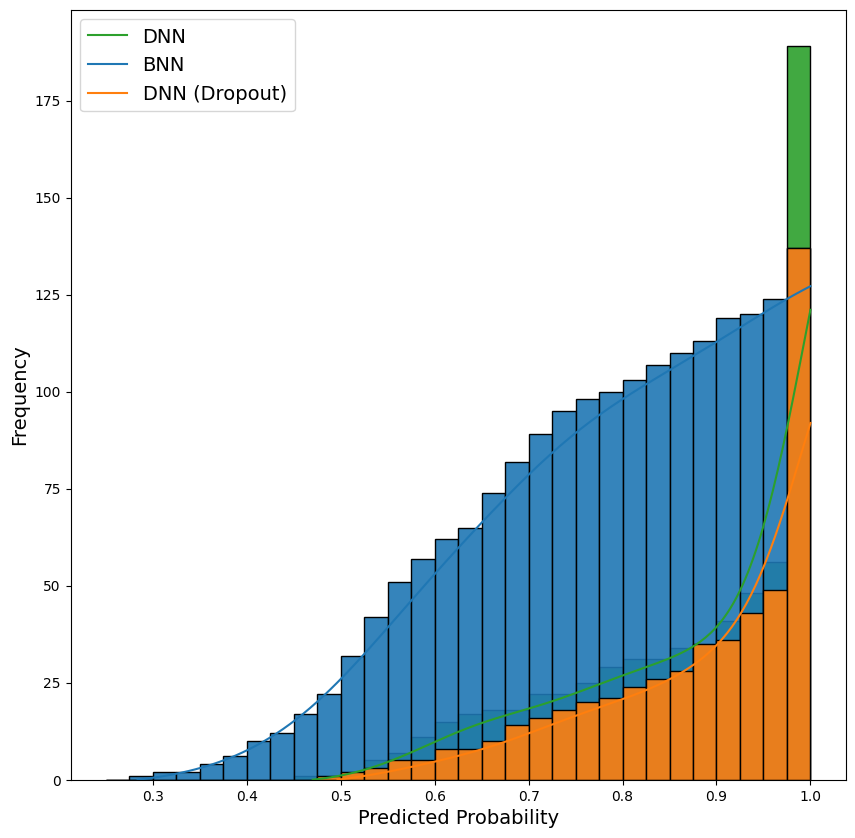

In [75]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
# models = ['bnn_sgp_600_1200', 'dnn_do_600_1200', 'dnn_600_1200']
models = ['bnn_sgp_600_1200', 'dnn_do_600_1200']

dict = model_dict['dnn_600_1200']

ax = sns.histplot(ax=ax, data=dict['probs']['incorrect']['max'], bins=np.arange(0.25,1.025,0.025), label=model, alpha=0.9, kde=True, cumulative=True, color=sns.color_palette("tab10")[2], multiple='stack')

for i, model in enumerate(models):
    dict = model_dict[model]

    ax = sns.histplot(ax=ax, data=dict['probs']['incorrect']['max'], bins=np.arange(0.25,1.025,0.025), label=model, alpha=0.9, kde=True, cumulative=True, color=sns.color_palette("tab10")[i], multiple='stack')

    # ax.hist(dict['probs']['incorrect']['max'], bins=30, label=model, alpha=0.5)    
    # ax.hist(dict['probs']['correct']['max'], bins=10, label='Correct', alpha=0.5)

# ax.legend(['BNN', 'DNN (Dropout)', 'DNN'], loc='upper left', prop={'size':14})
ax.legend(['DNN', 'BNN', 'DNN (Dropout)'], loc='upper left', prop={'size':14})
# ax.set_title("Confidence scores of incorrect predictions")
ax.set_xlabel("Predicted Probability", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)

plt.savefig('../plots/classification/incorrect_600_1200.png', bbox_inches='tight')
plt.show()

## Plot weight distribution for model

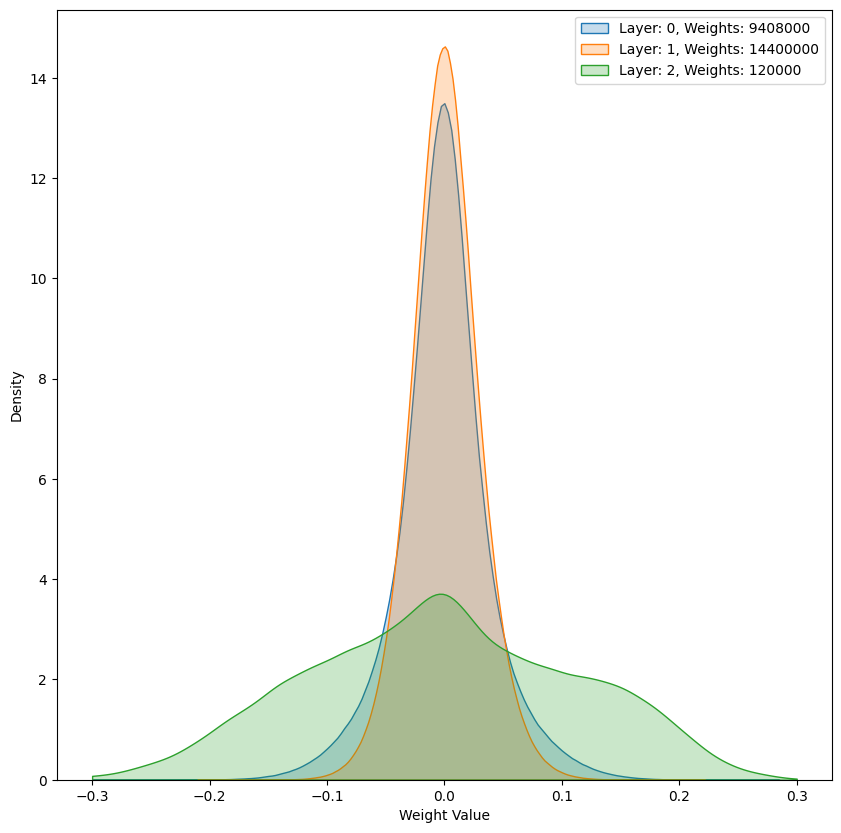

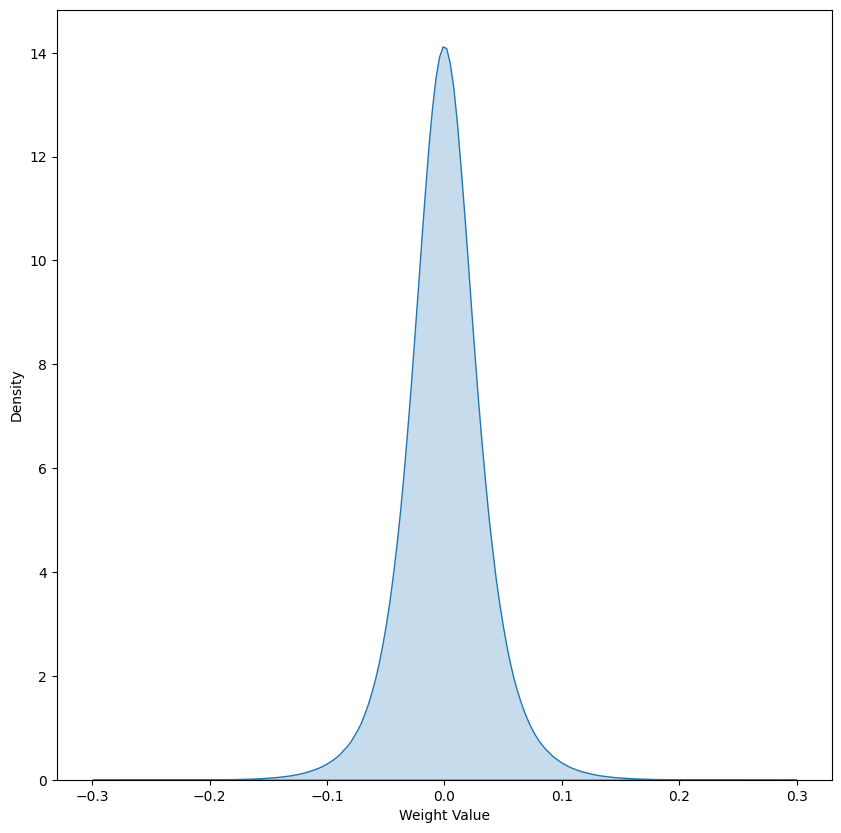

In [11]:
plot_weight_samples(net.weight_samples())

# Histogram plots of incorrect/correct predictions

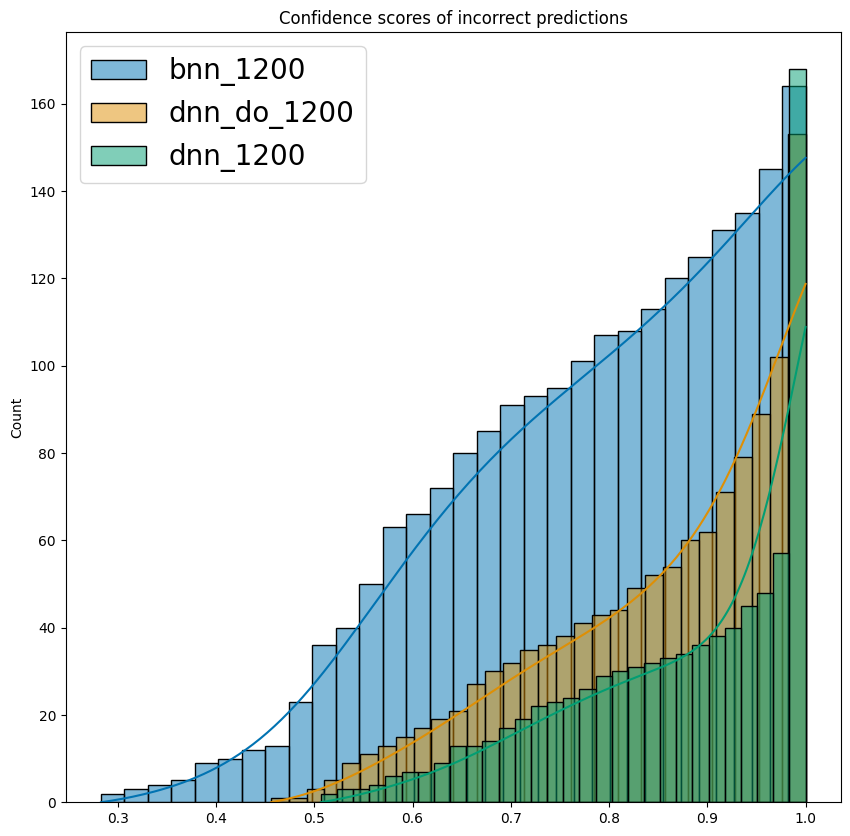

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
for i, model in enumerate(models):
    dict = model_dict[model]

    ax = sns.histplot(ax=ax, data=dict['probs']['incorrect']['max'], bins=30, label=model, alpha=0.5, kde=True, cumulative=True, color=sns.color_palette("colorblind")[i])

    # ax.hist(dict['probs']['incorrect']['max'], bins=30, label=model, alpha=0.5)    
    # ax.hist(dict['probs']['correct']['max'], bins=10, label='Correct', alpha=0.5)

ax.legend(loc='upper left', prop={'size':20})
ax.set_title("Confidence scores of incorrect predictions")
plt.show()

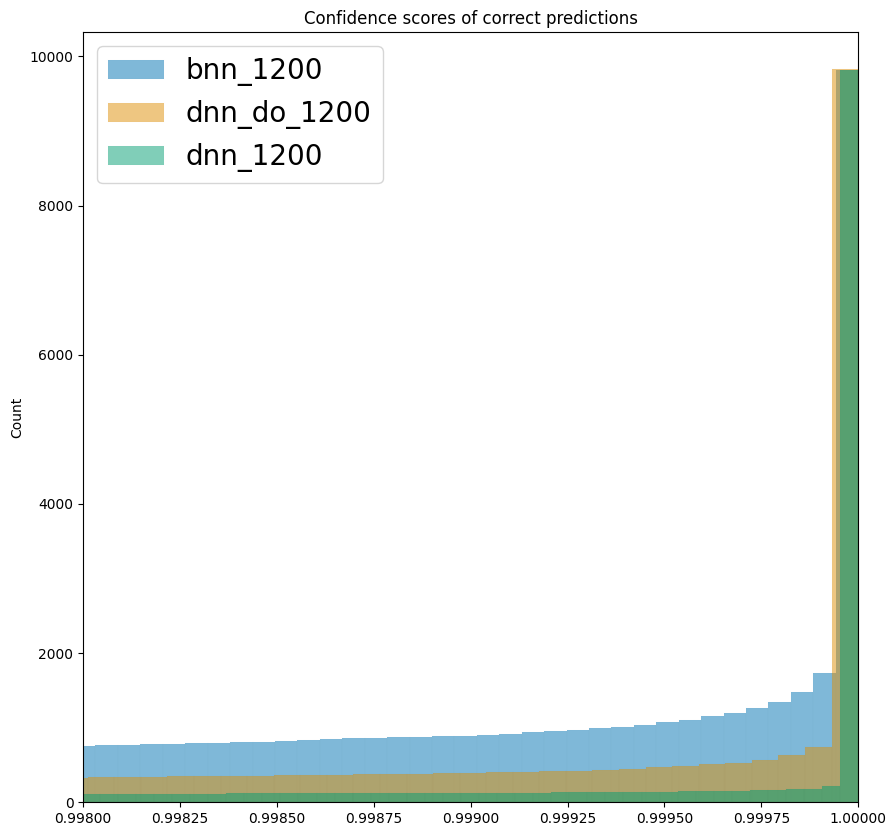

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
for i, model in enumerate(models):
    dict = model_dict[model]

    ax = sns.histplot(ax=ax, data=dict['probs']['correct']['max'], bins=10000, label=model, alpha=0.5, kde=False, cumulative=True, color=sns.color_palette("colorblind")[i])

    # ax.hist(dict['probs']['incorrect']['max'], bins=30, label=model, alpha=0.5)    
    # ax.hist(dict['probs']['correct']['max'], bins=10, label='Correct', alpha=0.5)

ax.legend(loc='upper left', prop={'size':20})
ax.set_xlim([0.998, 1.0])
ax.set_title("Confidence scores of correct predictions")
plt.show()

## Recorded Metrics

In [19]:
eval_metric = np.load(os.path.join(MODEL_DETAILS.dir, 'eval_metric.npy'))
print(eval_metric[-1])

fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.plot(eval_metric)

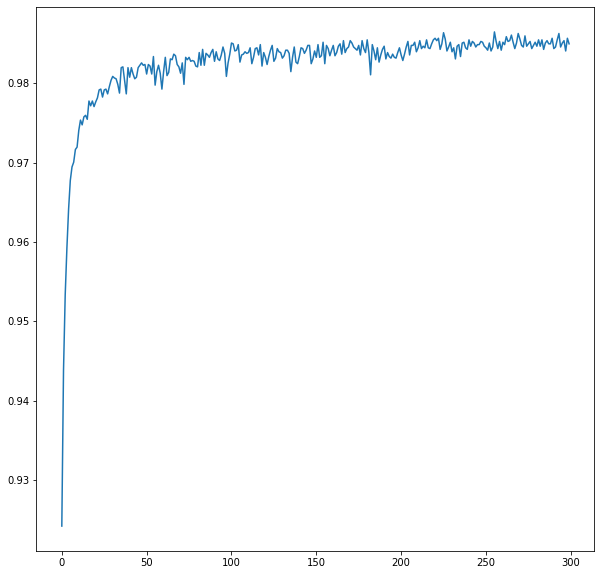

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.plot(eval_metric)

In [ ]:
loss = np.load(os.path.join(MODEL_DETAILS.dir, 'loss.npy'))

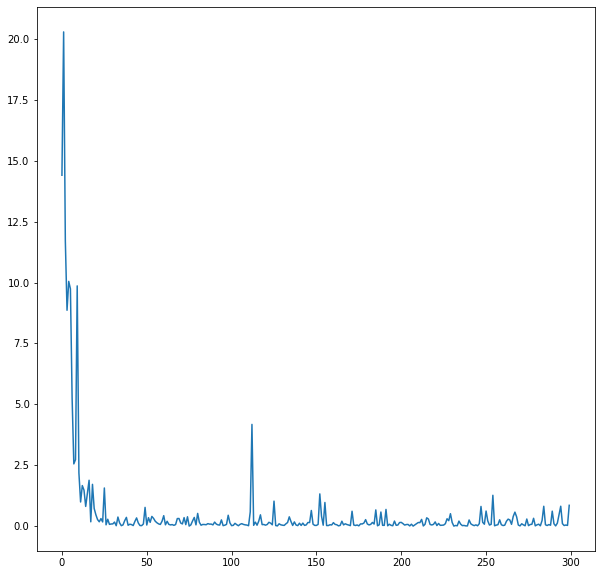

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.plot(loss)